## Abstracto

**Motivación:** El costo de las primas de seguro puede variar significativamente entre individuos, y entender los factores subyacentes es crucial tanto para consumidores como para aseguradoras. Este análisis explora un conjunto de datos sintético, inspirado en datos reales de seguros (proveniente de Kaggle Playground Series S4E12), con el objetivo de identificar y visualizar las características demográficas, socioeconómicas, de salud y de estilo de vida que parecen influir en el monto final de la prima (`Premium.Amount`). Buscamos descubrir patrones y relaciones clave a través de técnicas de análisis exploratorio de datos (EDA).

**Audiencia:** Los insights derivados de este análisis pueden ser de interés para:
* **Consumidores:** Para entender mejor qué factores pueden afectar el costo de sus seguros.
* **Analistas de Seguros y Actuarios:** Para obtener una perspectiva visual sobre cómo diferentes variables se relacionan con la prima en este tipo de dataset, lo cual puede informar estrategias de segmentación o evaluación de riesgos.
* **Estudiantes de Ciencia de Datos:** Como un caso práctico de aplicación de técnicas de EDA para extraer conocimiento a partir de datos tabulares complejos.

**Metodología:** Se utilizó Python y librerías como Pandas para la manipulación y limpieza de datos, y Matplotlib junto con Seaborn para la generación de visualizaciones descriptivas (histogramas, diagramas de caja, mapas de calor de correlación, etc.).

## Preguntas e Hipótesis del Análisis

Este análisis exploratorio de datos busca responder las siguientes preguntas clave sobre los factores que influyen en las primas de seguros, utilizando el dataset proporcionado:

**Sobre la Variable Objetivo y Datos Demográficos:**
* ¿Cómo se distribuye el monto de la prima (`Premium.Amount`)? ¿Presenta algún sesgo particular?
* ¿Cuál es la distribución de edad (`Age`) de los asegurados en este dataset?
* ¿Existen diferencias significativas en la prima promedio o mediana según el género (`Gender`) o el estado civil (`Marital.Status`)?

**Sobre Factores Socioeconómicos:**
* ¿Cómo se relaciona el nivel educativo (`Education.Level`) o la ocupación (`Occupation`) con el monto de la prima?
* ¿Se observa una relación clara (lineal o de otro tipo) entre el ingreso anual (`Annual.Income`) y la prima pagada?

**Sobre Estilo de Vida y Salud:**
* **Hipótesis:** Los fumadores (`Smoking.Status` = Yes) pagan primas significativamente más altas que los no fumadores. ¿Confirman los datos esta hipótesis?
* ¿Cómo influye la frecuencia de ejercicio (`Exercise.Frequency`) en el monto de la prima?
* ¿Existe una correlación visible entre el puntaje de salud (`Health.Score`) asignado y la prima del seguro?

**Sobre Características de la Póliza y el Cliente:**
* ¿Impacta la ubicación geográfica (`Location`) en el costo de la prima?
* ¿Tener reclamaciones previas (`Previous.Claims`) incrementa notablemente la prima?
* ¿Se observa alguna relación entre la antigüedad del vehículo (`Vehicle.Age`) y la prima?
* Considerando la baja correlación lineal observada, ¿el puntaje de crédito (`Credit.Score`) muestra alguna otra forma de asociación con la prima (ej., diferencias entre rangos)?
* ¿Cómo se distribuyen las variables categóricas como `Policy.Type` o `Property.Type` y cómo se relacionan con `Premium.Amount`?

**Sobre Correlaciones Numéricas:**
* ¿Existen correlaciones *lineales* fuertes entre las distintas variables predictoras numéricas? ¿Y entre estas y la `Premium.Amount`?

# Carga y Validación Inicial del Dataset de Seguros

**Fuente de Datos:** El dataset utilizado en este análisis es el conjunto de entrenamiento del "Insurance Dataset" alojado en Hugging Face, disponible en la siguiente URL:
[https://huggingface.co/datasets/IINOVAII/Insurance_Dataset/resolve/main/train.csv](https://huggingface.co/datasets/IINOVAII/Insurance_Dataset/resolve/main/train.csv)

**Pasos Realizados en el Código:**

1.  **Importación de Bibliotecas:** Se importa `pandas` para la manipulación de DataFrames y `io` para manejar la salida de `df.info()`.
2.  **Carga Segura:** Se intenta cargar el archivo CSV directamente desde la URL proporcionada usando `pd.read_csv()`. Se implementa un bloque `try-except` básico para capturar posibles errores durante la carga (ej. problemas de conexión, URL inválida) e informar si la carga fue exitosa o no.
3.  **Inspección Dimensional y de Memoria:**
    * `df.shape`: Muestra una tupla con el número de filas y columnas, dando una idea inmediata del tamaño del dataset.
    * `df.memory_usage(deep=True).sum()`: Calcula el uso total de memoria del DataFrame en bytes. El argumento `deep=True` asegura una introspección precisa, especialmente para columnas de tipo 'object' (cadenas de texto).
4.  **Vistazo a los Datos:**
    * `df.head()`: Muestra las primeras 5 filas. Útil para ver los nombres de las columnas y ejemplos iniciales de los datos, buscando patrones obvios o problemas de formato.
    * `df.tail()`: Muestra las últimas 5 filas. Ayuda a verificar si hay datos anómalos o diferentes al final del archivo (ej. filas de resumen o totales).
5.  **Análisis de Tipos y Nulos:**
    * `df.info()`: Proporciona un resumen conciso del DataFrame: el índice, el número total de columnas, el nombre de cada columna, el recuento de valores no nulos por columna y el tipo de dato (`Dtype`) de cada una. Es esencial para identificar rápidamente columnas con datos faltantes y verificar si los tipos de datos asignados por Pandas son los esperados. La salida se captura en un buffer para imprimirla de forma controlada.
6.  **Estadísticas Descriptivas Completas:**
    * `df.describe(include='all')`: Calcula estadísticas descriptivas. Con `include='all'`, se incluyen tanto las columnas numéricas (mostrando conteo, media, desviación estándar, mínimo, percentiles, máximo) como las categóricas/objeto (mostrando conteo, número de valores únicos, el valor más frecuente -top- y su frecuencia -freq-). Esto da una visión general rápida de la distribución y características centrales de cada variable. Se utiliza `pd.option_context` para asegurar que todas las columnas se muestren en la salida.

**Resumen Preliminar Esperado:**
*(Nota: Completa esta sección con los resultados reales después de ejecutar la celda de código)*
* **Dimensiones:** `[número de filas]` filas x `[número de columnas]` columnas.
* **Memoria:** `[valor en bytes/MB]` de uso de memoria.
* **Tipos y Nulos:** Se observan tipos `[listar tipos]`. La salida de `info()` detallará las columnas con posibles nulos.
* **Estadísticas:** La salida de `describe()` ofrecerá un resumen cuantitativo y cualitativo inicial de las variables.

**Instrucciones Adicionales:**

1.  **Ejecución:** Ejecuta la siguiente celda de código en tu entorno Python (Jupyter, Colab, etc.).
2.  **Bibliotecas:** Asegúrate de tener `pandas` instalado (`pip install pandas`).
3.  **Interpretación:** Analiza detenidamente cada sección de la salida generada por el código.
4.  **Completar Resumen:** Usa los resultados obtenidos para completar la sección "Resumen Preliminar Esperado" de esta celda Markdown.

In [37]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Carga Segura
url = 'https://huggingface.co/datasets/IINOVAII/Insurance_Dataset/resolve/main/train.csv'
df = None

try:
    df = pd.read_csv(url)
    print("DataFrame cargado exitosamente desde la URL.")
except Exception as e:
    print(f"Error al cargar el CSV: {e}")

# Proceder solo si df se cargó correctamente
if df is not None:
    print("\n--- Verificación Inicial del DataFrame ---")

    # 2. Inspección Dimensional
    print("\nDimensiones del DataFrame (filas, columnas):")
    print(df.shape)

    # 3. Vistazo a los Datos
    print("\nPrimeras 5 filas:")
    print(df.head())
    print("\nÚltimas 5 filas:")
    print(df.tail())

    # 4. Análisis de Tipos y Nulos
    print("\nInformación del DataFrame (Tipos de datos y no nulos):")
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_output = buffer.getvalue()
    print(info_output)

    # 5. Estadísticas Descriptivas Completas
    print("\nEstadísticas descriptivas (todas las columnas):")
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(df.describe(include='all'))

else:
    print("\nNo se pudo cargar el DataFrame. Análisis cancelado.")

DataFrame cargado exitosamente desde la URL.

--- Verificación Inicial del DataFrame ---

Dimensiones del DataFrame (filas, columnas):
(1200000, 21)

Primeras 5 filas:
   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural 

## Descripción de las Variables del Dataset

A continuación se detalla el significado probable de cada columna presente en el dataset de seguros:

* **`id`**: Identificador único asignado a cada registro (posiblemente cada cliente o póliza).
* **`Age`**: Edad del cliente en años.
* **`Gender`**: Género del cliente (ej. 'Female', 'Male').
* **`Annual Income`**: Ingresos anuales reportados por el cliente.
* **`Marital Status`**: Estado civil del cliente (ej. 'Married', 'Single', 'Divorced').
* **`Number of Dependents`**: Número de personas que dependen económicamente del cliente.
* **`Education Level`**: Nivel educativo más alto alcanzado por el cliente (ej. 'High School', 'Bachelor's', 'Master's', 'PhD').
* **`Occupation`**: Tipo de ocupación o situación laboral del cliente (ej. 'Employed', 'Self-Employed', 'Unemployed').
* **`Health Score`**: Una puntuación numérica que probablemente refleja el estado de salud general del cliente o una evaluación de riesgo relacionada con la salud.
* **`Location`**: Tipo de zona geográfica donde reside el cliente (ej. 'Urban', 'Suburban', 'Rural').
* **`Policy Type`**: Categoría o tipo de la póliza de seguro contratada (ej. 'Premium', 'Standard', 'Basic').
* **`Previous Claims`**: Número de siniestros o reclamaciones realizadas previamente por el cliente a la aseguradora.
* **`Vehicle Age`**: Antigüedad del vehículo asegurado (probablemente en años). *Nota: Esto asume que el seguro está relacionado con vehículos, lo cual parece probable pero debería confirmarse.*
* **`Credit Score`**: Puntuación crediticia del cliente, utilizada comúnmente para evaluar el riesgo financiero.
* **`Insurance Duration`**: Duración de la relación del cliente con la aseguradora o antigüedad de la póliza actual (probablemente en años).
* **`Policy Start Date`**: Fecha exacta (posiblemente con hora) en la que comenzó la vigencia de la póliza de seguro.
* **`Customer Feedback`**: Nivel de satisfacción o feedback proporcionado por el cliente (ej. 'Poor', 'Average', 'Good').
* **`Smoking Status`**: Indica si el cliente es fumador ('Yes') o no ('No').
* **`Exercise Frequency`**: Frecuencia con la que el cliente realiza ejercicio físico (ej. 'Weekly', 'Monthly', 'Daily', 'Never').
* **`Property Type`**: Tipo de propiedad principal del cliente, relevante para ciertos tipos de seguro (ej. 'House', 'Apartment', 'Condo').
* **`Premium Amount`**: Monto de la prima (el costo) que el cliente paga por la póliza de seguro.

# Análisis de Calidad de Datos y Plan de Limpieza

Este documento resume el análisis de valores faltantes (NaNs) y tipos de datos incorrectos en el dataset de seguros, y detalla la estrategia de limpieza propuesta antes del modelado o análisis profundo.

## 1. Cuantificación de Valores Faltantes

Se calculó el porcentaje de valores faltantes (NaN) para cada columna. Las columnas con el mayor porcentaje de datos ausentes son las siguientes (ordenadas de mayor a menor):

* **`Previous Claims`**: ~30.33%
* **`Occupation`**: ~29.84%
* **`Credit Score`**: ~11.49%
* **`Number of Dependents`**: ~9.14%
* **`Customer Feedback`**: ~6.48%
* **`Health Score`**: ~6.17%
* **`Annual Income`**: ~3.75%
* **`Marital Status`**: ~1.54%
* **`Age`**: ~1.56%
* **`Vehicle Age`**: ~0.0005% (6 valores)
* **`Insurance Duration`**: ~0.00008% (1 valor)
    *(Nota: Los porcentajes exactos se calcularán y mostrarán en la celda de código)*

Las demás columnas (`id`, `Gender`, `Education Level`, `Location`, `Policy Type`, `Policy Start Date`, `Smoking Status`, `Exercise Frequency`, `Property Type`, `Premium Amount`) no presentan valores faltantes.

## 2. Estrategia de Imputación de Valores Faltantes

Se propone la siguiente estrategia para manejar los NaNs, enfocándose en las columnas con >1% de valores faltantes y tratando también las que tienen muy pocos:

* **`Previous Claims` (Numérica/Conteo, ~30% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Es una variable de conteo. La mediana (valor=1.0 según `describe`) es robusta a posibles valores atípicos (clientes con muchas reclamaciones) y es un valor central razonable. Asumir 0 podría ser incorrecto.
* **`Occupation` (Categórica, ~30% NaN):**
    * **Estrategia:** Imputar con un valor constante: **'Unknown'**.
    * **Justificación:** Es una variable categórica con alta proporción de faltantes. Imputar con la moda ('Employed') podría distorsionar significativamente la distribución. Crear una categoría 'Unknown' preserva explícitamente la información de que el dato estaba ausente, lo cual podría ser relevante para el modelo.
* **`Credit Score` (Numérica, ~11.5% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** La mediana es robusta a outliers y sesgos, proporcionando una estimación central adecuada para una puntuación como esta.
* **`Number of Dependents` (Numérica/Conteo, ~9% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Similar a `Previous Claims`, la mediana es adecuada para datos de conteo que podrían estar sesgados.
* **`Customer Feedback` (Categórica, ~6.5% NaN):**
    * **Estrategia:** Imputar con un valor constante: **'Unknown'**.
    * **Justificación:** Similar a `Occupation`, permite mantener la información sobre la ausencia del dato sin introducir sesgos hacia la moda ('Average').
* **`Health Score` (Numérica, ~6% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Estrategia robusta para una variable de puntuación continua.
* **`Annual Income` (Numérica, ~3.75% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Los ingresos suelen tener una distribución sesgada a la derecha con outliers. La mediana es mucho menos sensible a estos valores extremos que la media.
* **`Marital Status` (Categórica, ~1.5% NaN):**
    * **Estrategia:** Imputar con un valor constante: **'Unknown'**.
    * **Justificación:** Aunque el porcentaje es bajo, usar 'Unknown' es más seguro que imputar con la moda ('Single') para evitar introducir información potencialmente incorrecta.
* **`Age` (Numérica, ~1.5% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Imputación robusta y simple para la edad.
* **`Vehicle Age` (Numérica, <0.01% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Con tan pocos valores faltantes, la imputación con mediana (o media/moda) tendrá un impacto mínimo y es sencilla de implementar.
* **`Insurance Duration` (Numérica, <0.01% NaN):**
    * **Estrategia:** Imputar con la **Mediana**.
    * **Justificación:** Igual que para `Vehicle Age`.

## 3. Tratamiento de Fechas

* **`Policy Start Date` (Object):**
    * **Transformación:** Convertir la columna al tipo `datetime`. Dado que la hora parece ser constante o irrelevante para análisis típicos de inicio de póliza, se **normalizará la fecha a medianoche (00:00:00)**, manteniendo solo la información del día, mes y año, pero conservando el tipo `datetime` para futuras operaciones. Se sobrescribirá la columna original.

In [39]:
print("Creando una copia del DataFrame original (df_cleaned)...")
df_cleaned = df.copy()
print("Copia creada.")
print("-" * 50)

print("Porcentaje de valores faltantes por columna (en df original):")
nan_percentages_original = df.isnull().sum() / len(df) * 100
print(nan_percentages_original.sort_values(ascending=False))
print("-" * 50)


median_previous_claims = df_cleaned['Previous Claims'].median()
median_credit_score = df_cleaned['Credit Score'].median()
median_num_dependents = df_cleaned['Number of Dependents'].median()
median_health_score = df_cleaned['Health Score'].median()
median_annual_income = df_cleaned['Annual Income'].median()
median_age = df_cleaned['Age'].median()
median_vehicle_age = df_cleaned['Vehicle Age'].median()
median_insurance_duration = df_cleaned['Insurance Duration'].median()

print("Aplicando imputaciones sobre df_cleaned...")

df_cleaned['Previous Claims'] = df_cleaned['Previous Claims'].fillna(median_previous_claims)
df_cleaned['Credit Score'] = df_cleaned['Credit Score'].fillna(median_credit_score)
df_cleaned['Number of Dependents'] = df_cleaned['Number of Dependents'].fillna(median_num_dependents)
df_cleaned['Health Score'] = df_cleaned['Health Score'].fillna(median_health_score)
df_cleaned['Annual Income'] = df_cleaned['Annual Income'].fillna(median_annual_income)
df_cleaned['Age'] = df_cleaned['Age'].fillna(median_age)
df_cleaned['Vehicle Age'] = df_cleaned['Vehicle Age'].fillna(median_vehicle_age)
df_cleaned['Insurance Duration'] = df_cleaned['Insurance Duration'].fillna(median_insurance_duration)

df_cleaned['Occupation'] = df_cleaned['Occupation'].fillna('Unknown')
df_cleaned['Customer Feedback'] = df_cleaned['Customer Feedback'].fillna('Unknown')
df_cleaned['Marital Status'] = df_cleaned['Marital Status'].fillna('Unknown')

print("Imputaciones aplicadas en df_cleaned.")
print("-" * 50)

print("Convirtiendo 'Policy Start Date' a datetime y normalizando en df_cleaned...")
df_cleaned['Policy Start Date'] = pd.to_datetime(df_cleaned['Policy Start Date'], errors='coerce')

if df_cleaned['Policy Start Date'].isnull().any():
    print("¡Alerta! Se encontraron valores NaT en 'Policy Start Date' de df_cleaned después de la conversión. Revisar datos originales o decidir estrategia para NaT.")
else:
     df_cleaned['Policy Start Date'] = df_cleaned['Policy Start Date'].dt.normalize()
     print("'Policy Start Date' convertida y normalizada exitosamente en df_cleaned.")

print("-" * 50)

print("Verificación de NaNs en df_cleaned después de la limpieza:")
print(df_cleaned.isnull().sum())
print("-" * 50)
print("Verificación de tipos de datos (Dtypes) en df_cleaned después de la limpieza:")
print(df_cleaned.dtypes)
print("-" * 50)

print("Comparación de NaNs (Original vs Limpio):")
comparison_nans = pd.DataFrame({
    'NaNs Original': df.isnull().sum(),
    'NaNs Limpio': df_cleaned.isnull().sum()
})
print(comparison_nans[comparison_nans['NaNs Original'] > 0])
print("-" * 50)

print("Proceso de limpieza inicial (sobre copia) completado.")

Creando una copia del DataFrame original (df_cleaned)...
Copia creada.
--------------------------------------------------
Porcentaje de valores faltantes por columna (en df original):
Previous Claims         30.335750
Occupation              29.839583
Credit Score            11.490167
Number of Dependents     9.139333
Customer Feedback        6.485333
Health Score             6.173000
Annual Income            3.745750
Age                      1.558750
Marital Status           1.544083
Vehicle Age              0.000500
Insurance Duration       0.000083
id                       0.000000
Property Type            0.000000
Exercise Frequency       0.000000
Smoking Status           0.000000
Policy Type              0.000000
Policy Start Date        0.000000
Location                 0.000000
Education Level          0.000000
Gender                   0.000000
Premium Amount           0.000000
dtype: float64
--------------------------------------------------
Aplicando imputaciones sobre df_clea

## Comparación Visual de Distribuciones Antes y Después de la Imputación

Para evaluar el impacto de la imputación de valores faltantes en la distribución general de los datos, generaremos gráficos comparativos para las variables clave que fueron tratadas. Compararemos el DataFrame original (`df`) con el DataFrame limpio (`df_cleaned`).

**Estrategia de Visualización:**

1.  **Variables Numéricas:**
    * Se utilizarán **Gráficos de Densidad (KDE)** superpuestos. Estos gráficos muestran la forma de la distribución de probabilidad de una variable. Compararemos la curva de densidad de la variable en `df` (excluyendo los NaNs originales) con la curva de la misma variable en `df_cleaned` (que incluye los valores imputados, típicamente la mediana).
    * **Interpretación:** Buscaremos que las formas de las curvas sean muy similares. Una ligera "concentración" o pico alrededor de la mediana en la curva de `df_cleaned` es esperable (especialmente en variables con muchos NaNs), pero la forma general debería mantenerse. Cambios drásticos en la forma indicarían que la imputación alteró significativamente la distribución.

2.  **Variables Categóricas:**
    * Se utilizarán **Gráficos de Conteo (Countplots)** lado a lado (o en subplots separados). Estos gráficos muestran la frecuencia (número de ocurrencias) de cada categoría.
    * **Interpretación:** Compararemos las alturas de las barras para cada categoría existente entre `df` y `df_cleaned`. Las alturas deberían ser casi idénticas para las categorías originales. En `df_cleaned`, veremos una nueva barra correspondiente a la categoría 'Unknown' (o la categoría imputada), cuya altura representará el número de NaNs que fueron imputados en esa columna.

El siguiente código generará estas visualizaciones para las columnas más afectadas por la imputación.

Generando gráficos comparativos...

--- Comparando Variables Numéricas (KDE Plots) ---


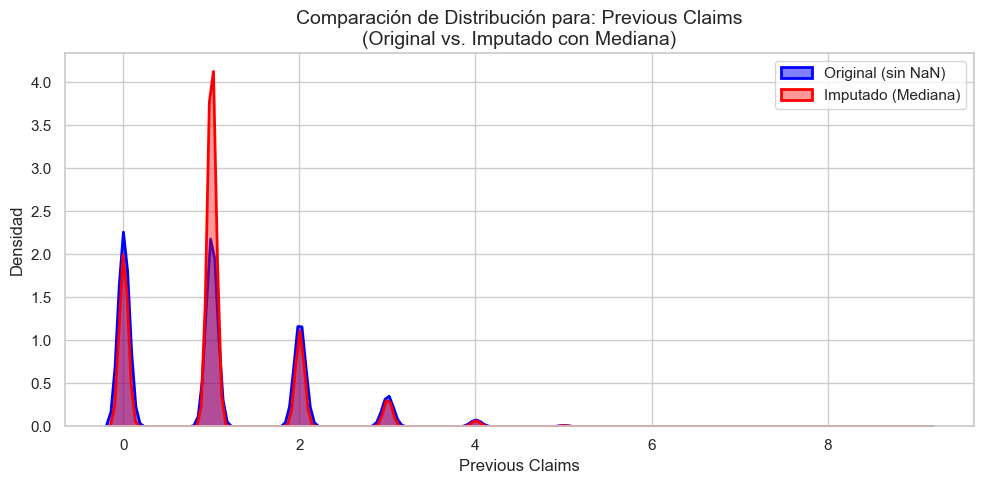

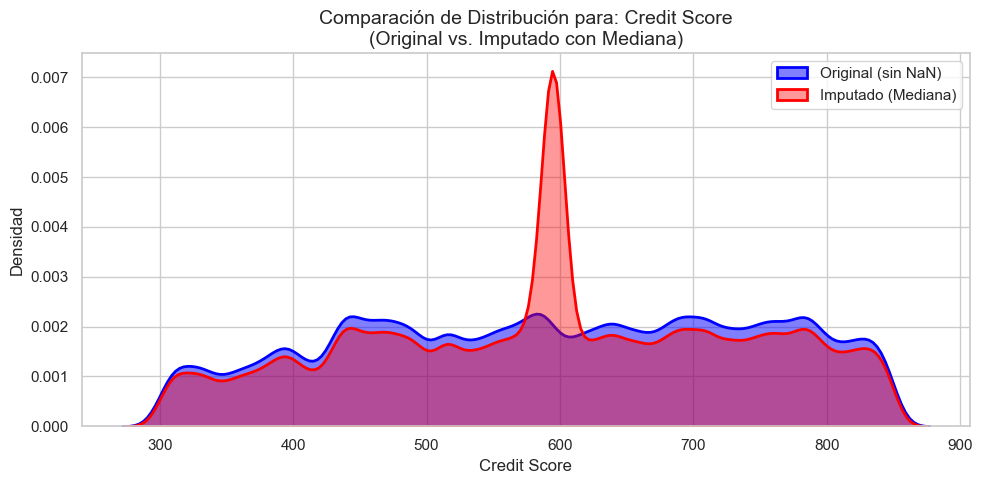

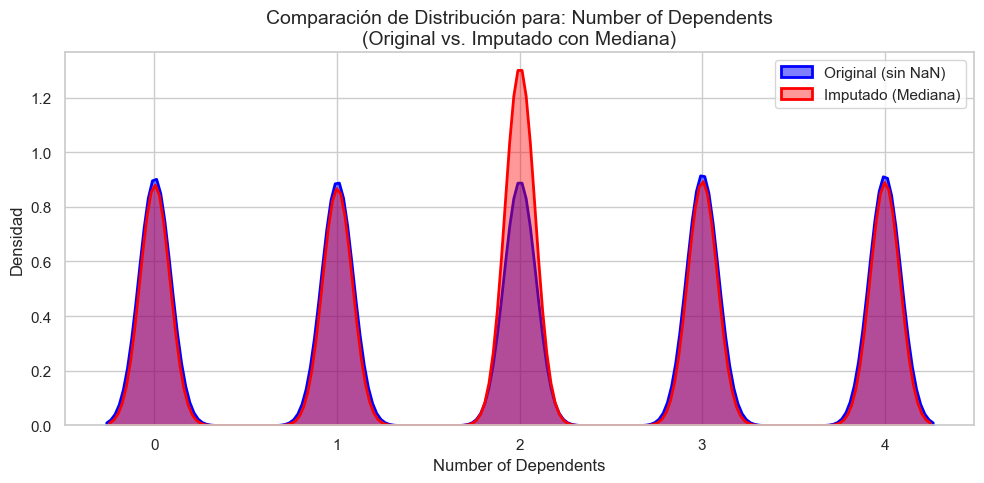

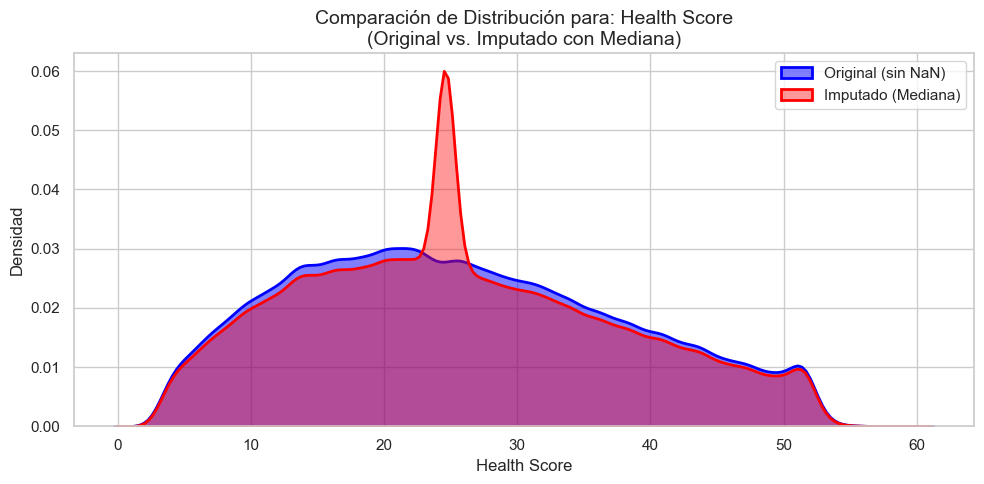

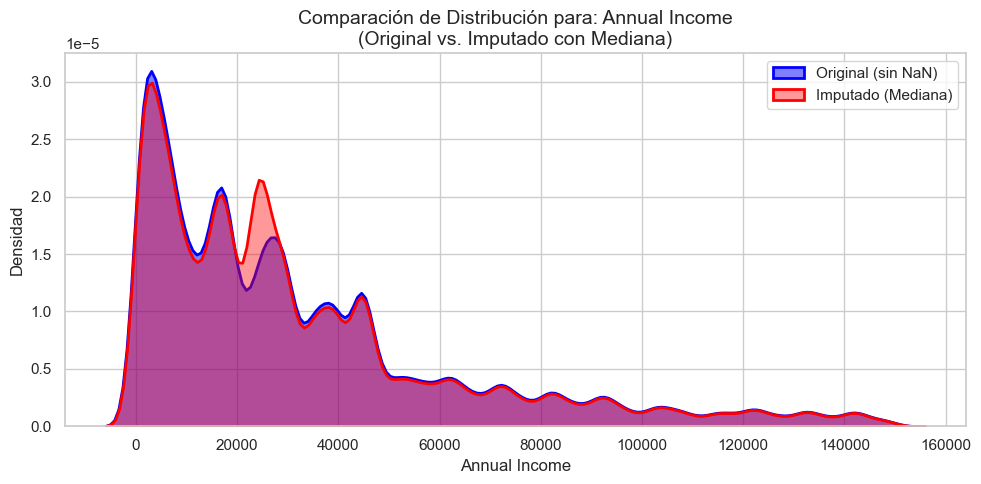

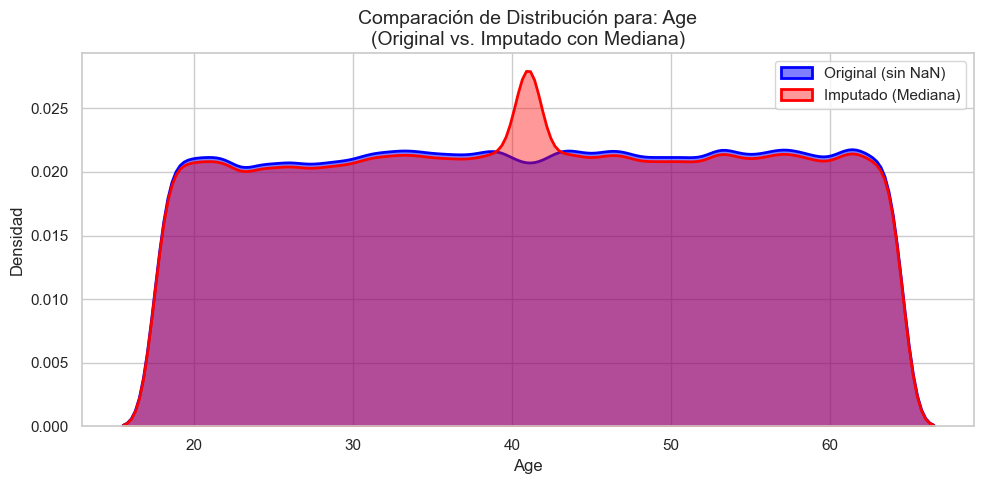


--- Comparando Variables Categóricas (Count Plots) ---


C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[0], palette='Blues_d', order=df[col].value_counts().index)
C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, ax=axes[1], palette='Reds_d', order=order_cleaned)


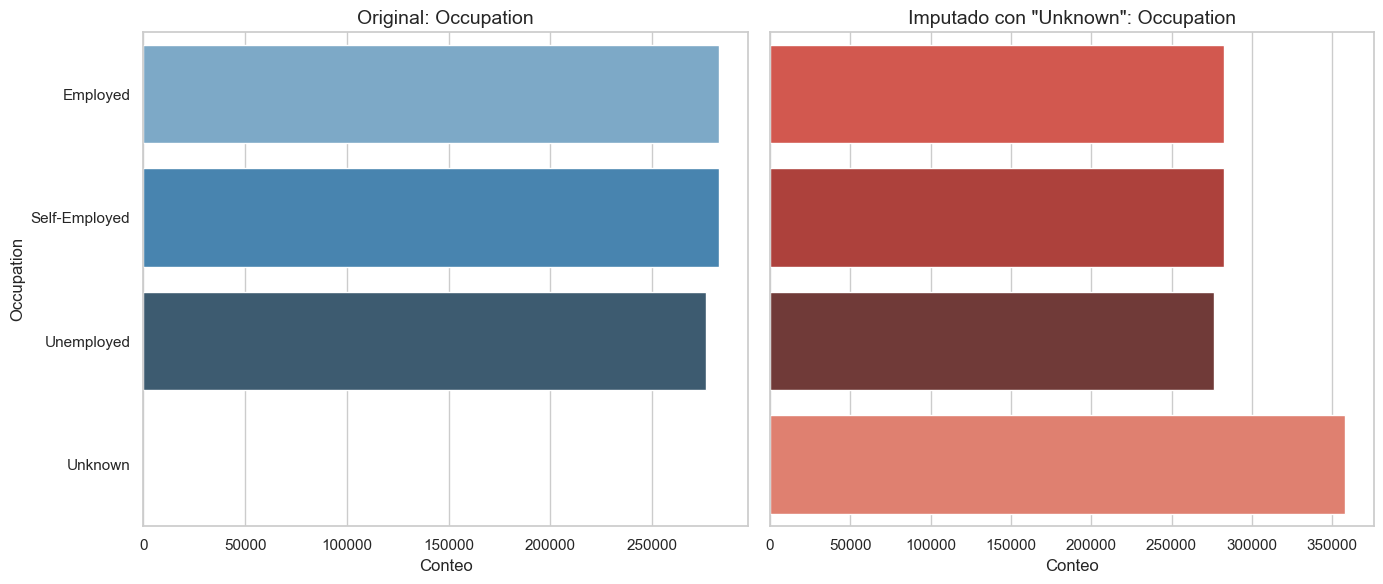

C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[0], palette='Blues_d', order=df[col].value_counts().index)
C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, ax=axes[1], palette='Reds_d', order=order_cleaned)


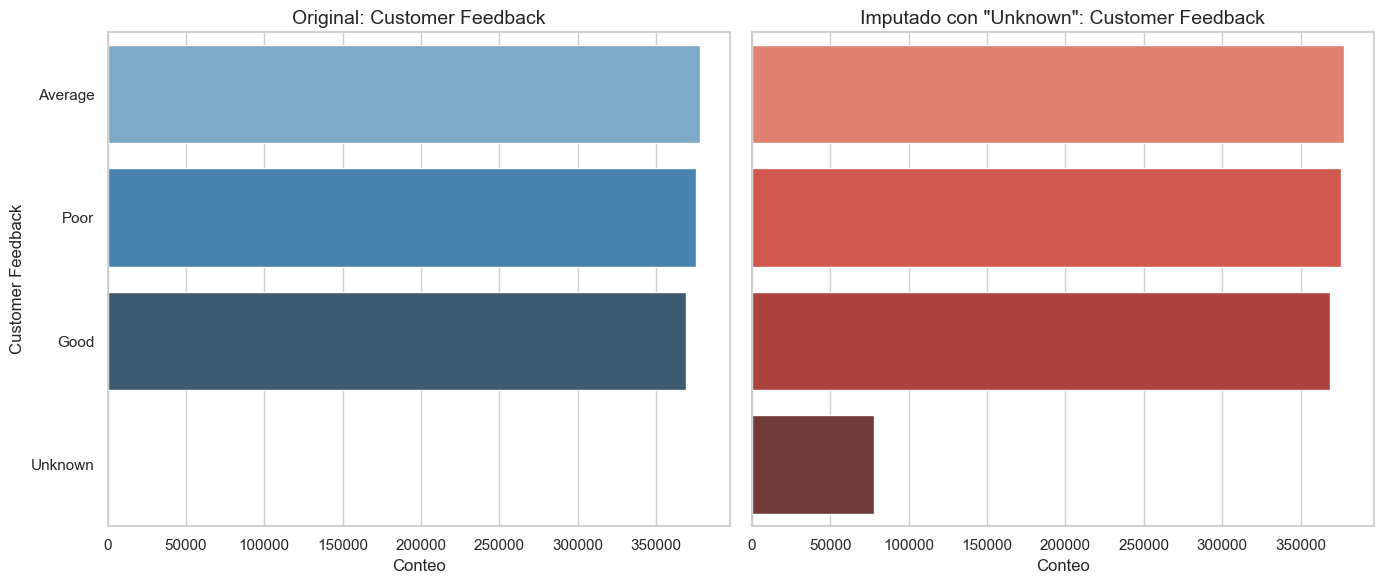

C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, ax=axes[0], palette='Blues_d', order=df[col].value_counts().index)
C:\Users\Maxim\AppData\Local\Temp\ipykernel_34956\28428796.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, y=col, ax=axes[1], palette='Reds_d', order=order_cleaned)


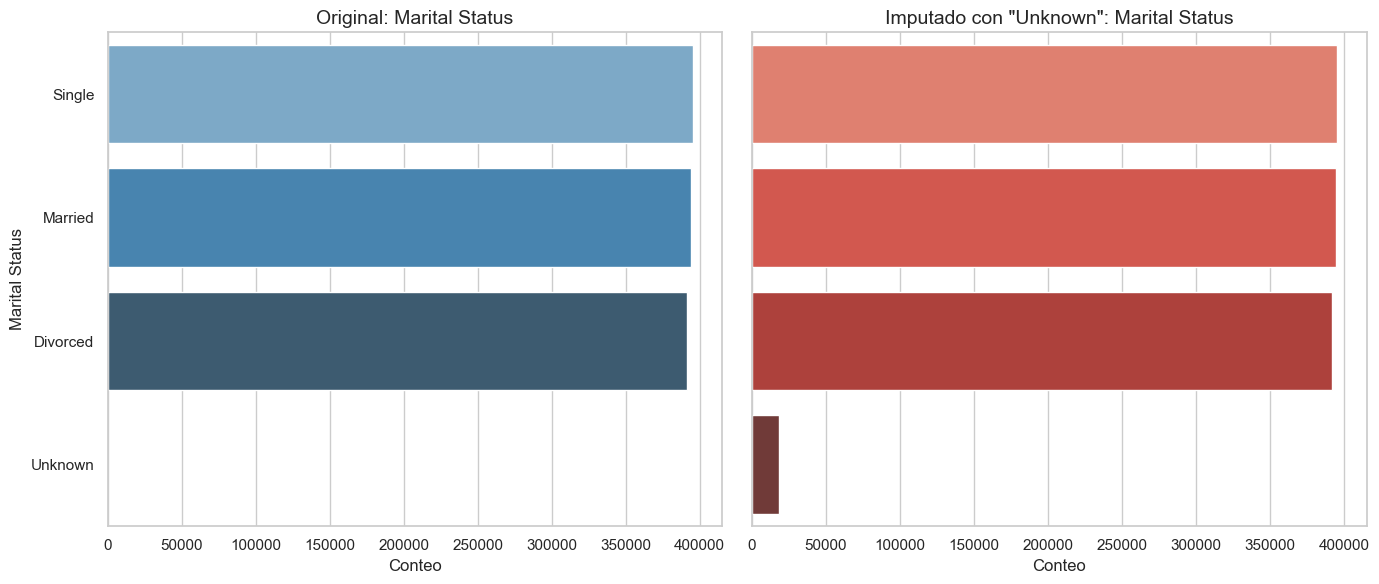


Generación de gráficos completada.


In [41]:
print("Generando gráficos comparativos...")

numerical_cols_imputed = [
    'Previous Claims', 'Credit Score', 'Number of Dependents',
    'Health Score', 'Annual Income', 'Age'
]

sns.set(style="whitegrid")

print("\n--- Comparando Variables Numéricas (KDE Plots) ---")
for col in numerical_cols_imputed:
    plt.figure(figsize=(10, 5))

    sns.kdeplot(df[col].dropna(), label='Original (sin NaN)', color='blue', fill=True, alpha=0.5, linewidth=2)

    sns.kdeplot(df_cleaned[col], label='Imputado (Mediana)', color='red', fill=True, alpha=0.4, linewidth=2)

    plt.title(f'Comparación de Distribución para: {col}\n(Original vs. Imputado con Mediana)', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Densidad', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

categorical_cols_imputed = ['Occupation', 'Customer Feedback', 'Marital Status']

print("\n--- Comparando Variables Categóricas (Count Plots) ---")
for col in categorical_cols_imputed:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # sharey para misma escala Y

    sns.countplot(data=df, y=col, ax=axes[0], palette='Blues_d', order=df[col].value_counts().index)
    axes[0].set_title(f'Original: {col}', fontsize=14)
    axes[0].set_xlabel('Conteo', fontsize=12)
    axes[0].set_ylabel(col, fontsize=12)

    order_cleaned = df_cleaned[col].value_counts().index
    sns.countplot(data=df_cleaned, y=col, ax=axes[1], palette='Reds_d', order=order_cleaned)
    axes[1].set_title(f'Imputado con "Unknown": {col}', fontsize=14)
    axes[1].set_xlabel('Conteo', fontsize=12)
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()


print("\nGeneración de gráficos completada.")

## Resumen del Análisis Visual Comparativo Post-Imputación

Se realizó un análisis visual comparando las distribuciones de las variables antes (`df`) y después (`df_cleaned`) del proceso de imputación de valores faltantes, utilizando los gráficos generados previamente

**1. Análisis de Variables Numéricas (Gráficos KDE Superpuestos)**

La comparación de las curvas de densidad reveló lo siguiente:

* **Impacto Alto / Distorsión Moderada (`Previous Claims`, `Number of Dependents`):**
    * Debido al alto porcentaje original de NaNs (~30% y ~9%), la imputación con la **mediana** resultó en un **pico de densidad muy pronunciado** en ese valor específico (1.0 y ~2.0 respectivamente) en el dataset limpio (`df_cleaned`).
    * Si bien la naturaleza discreta subyacente aún se intuye, esta concentración **altera notablemente** la distribución visual original de los datos no faltantes. Este es un efecto **esperado** al imputar muchos valores con una constante.
* **Impacto Moderado-Bajo (`Credit Score`):**
    * Con 11.5% de NaNs, se observa un **pico visible en la mediana** (~595) en `df_cleaned`.
    * Sin embargo, la **forma general** de la distribución se **preserva razonablemente bien** en comparación con la original.
* **Impacto Mínimo / Excelente Preservación (`Health Score`, `Annual Income`, `Age`):**
    * Gracias al bajo porcentaje de NaNs originales (< ~6%), las curvas de densidad antes y después de la imputación son **casi idénticas**.
    * El efecto de la imputación con mediana es **mínimo o imperceptible**.
    * Se destaca que la fuerte **asimetría** de `Annual Income` se mantuvo intacta.

**2. Análisis de Variables Categóricas (Gráficos de Conteo Comparativos)**

La comparación de los conteos por categoría mostró:

* **Creación de Categoría 'Unknown':** La estrategia de imputar con 'Unknown' se refleja claramente. En `df_cleaned`, aparece una nueva barra para esta categoría en `Occupation`, `Customer Feedback` y `Marital Status`.
* **Representación de NaNs Originales:** La altura de la barra 'Unknown' es proporcional al porcentaje de NaNs original: muy grande para `Occupation` (30%), moderada para `Customer Feedback` (6.5%) y pequeña para `Marital Status` (1.5%).
* **Preservación de Categorías Originales:** Las frecuencias (alturas de las barras) de las categorías preexistentes (`Employed`, `Average`, `Single`, etc.) se mantienen visualmente **muy similares** entre `df` y `df_cleaned`, indicando que la imputación no distorsionó sus conteos relativos.
* **Transparencia:** La estrategia funcionó como se esperaba, aislando los datos faltantes en una categoría específica y aportando transparencia al proceso.

**3. Conclusión General del Análisis Visual**

Las visualizaciones confirman que:

* El proceso técnico de imputación se aplicó correctamente según la estrategia definida (mediana para numéricos, 'Unknown' para categóricos).
* El **impacto visual varía según la cantidad de datos faltantes originales**: es mínimo para variables con pocos NaNs y notable (pero esperado) para variables con muchos NaNs.
* Las **distorsiones observadas** (picos en medianas, categoría 'Unknown' grande) son **consecuencias directas e inevitables** de los métodos de imputación simple utilizados para lograr un dataset completo.
* El dataset limpio (`df_cleaned`) es consistente con el proceso aplicado. Aunque las distribuciones de algunas variables fueron alteradas, esto se hizo de manera controlada y documentada.

**Recomendación:** El dataset `df_cleaned` es adecuado para proceder al Análisis Exploratorio de Datos (EDA) profundo y al modelado, siempre que el analista **sea consciente del impacto de la imputación**, especialmente en las variables `Previous Claims`, `Number of Dependents` y `Occupation`. La validación visual realizada es un paso crucial para entender las características del dataset limpio.

# Resumen Detallado: Análisis de Distribución de `Premium Amount`

## Análisis Profundo: ¿Cómo se distribuyen las Primas de Seguro (`Premium Amount`)?

Este resumen detalla los hallazgos clave sobre la distribución de la variable `Premium Amount` (Monto de la Prima) en el dataset limpio (`df_cleaned`), basados en estadísticas descriptivas y las visualizaciones generadas por el análisis de las visualizaciones.

**1. Estadísticas Descriptivas Clave**

Las métricas principales para `Premium Amount` calculadas a partir de `df_cleaned` son:

* **count:** 1,200,000
* **mean:** \$1102.55
* **std:** \$865.00 (Desviación Estándar)
* **min:** \$20.00
* **25% (Q1):** \$514.00
* **50% (Median):** \$872.00
* **75% (Q3):** \$1509.00
* **max:** \$4999.00

**2. Interpretación Visual**

El análisis de las visualizaciones (Histograma con KDE y Diagrama de Caja) generadas para `Premium Amount` revela:

* **Histograma y KDE:**
    * Muestran una distribución **unimodal** (un pico principal).
    * Confirman una **fuerte asimetría positiva (sesgo a la derecha)**. La gran mayoría de las primas se concentran en valores bajos, con el pico de frecuencia situado aproximadamente entre 500 y 1000. 
    * Se observa una **larga cola** que se extiende hacia los valores más altos (hasta el máximo de 4999), indicando que existen primas elevadas aunque sean menos frecuentes.
* **Diagrama de Caja (Boxplot):**
    * La línea de la **mediana (872)** se ubica en la parte inferior de la caja, reforzando visualmente el sesgo a la derecha.
    * La caja (IQR) abarca desde 514 (Q1) hasta 1509 (Q3), mostrando la dispersión del 50% central de los datos (995 de rango intercuartil).
    * Lo más destacado es la **gran cantidad de puntos individuales (outliers)** situados por encima del bigote superior (que termina alrededor de \$3000). Estos representan primas significativamente altas en comparación con el resto.
    * El valor mínimo de 20 también aparece como un outlier inferior.

**3. Síntesis y Hallazgos Principales**

* **Fuerte Asimetría Derecha:** Confirmada tanto por la diferencia entre la media (1102.5) y la mediana (872) como por la forma visual de los gráficos generados.
* **Valor Típico (Central):** La mediana (872) es la medida más representativa de una prima "común", ya que la media está inflada por los valores altos.
* **Alta Variabilidad:** La desviación estándar (865) es muy elevada (cerca del 78% de la media), y el amplio rango intercuartil (995) y total (20 a 4999) indican una gran dispersión en los montos de las primas.
* **Presencia Notable de Outliers Altos:** Un número significativo de pólizas tienen primas superiores a \$3000, formando una larga cola superior. Estos valores altos son una característica dominante de la distribución observada.

**4. Implicaciones para el Negocio (Aseguradora)**

* **Análisis y Modelado:** Dada la fuerte asimetría y los outliers, el uso directo de la media puede ser engañoso. Se recomienda utilizar la mediana como indicador central y emplear técnicas robustas a outliers o transformaciones de datos (ej. logarítmica) para modelos sensibles a la distribución.
* **Segmentación Clave:** La alta variabilidad y la cola de valores altos sugieren fuertemente la necesidad de segmentar. Es crucial investigar qué factores (tipo de póliza, perfil de riesgo del cliente, historial, etc.) explican estas primas elevadas.
* **Gestión de Riesgo y Rentabilidad:** El segmento de primas altas (outliers > ~3000) requiere un análisis específico. Comprender si corresponden a productos premium, riesgos mayores o errores de datos es vital para la tarificación precisa y la gestión de la rentabilidad de la cartera.
* **Límites:** Los valores mínimo (20) y máximo (4999) podrían indicar límites específicos de los productos ofrecidos o del propio dataset, lo cual podría merecer una investigación adicional.

En conclusión, `Premium Amount` presenta una distribución muy sesgada a la derecha, con alta variabilidad y una cantidad importante de primas elevadas que se desvían del comportamiento central. Estas características, identificadas a través de las estadísticas y las visualizaciones generadas, son fundamentales para guiar análisis futuros y decisiones de negocio.

--- Estadísticas Descriptivas para 'Premium Amount' ---
count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64
--------------------------------------------------
--- Generando Visualizaciones para 'Premium Amount' ---


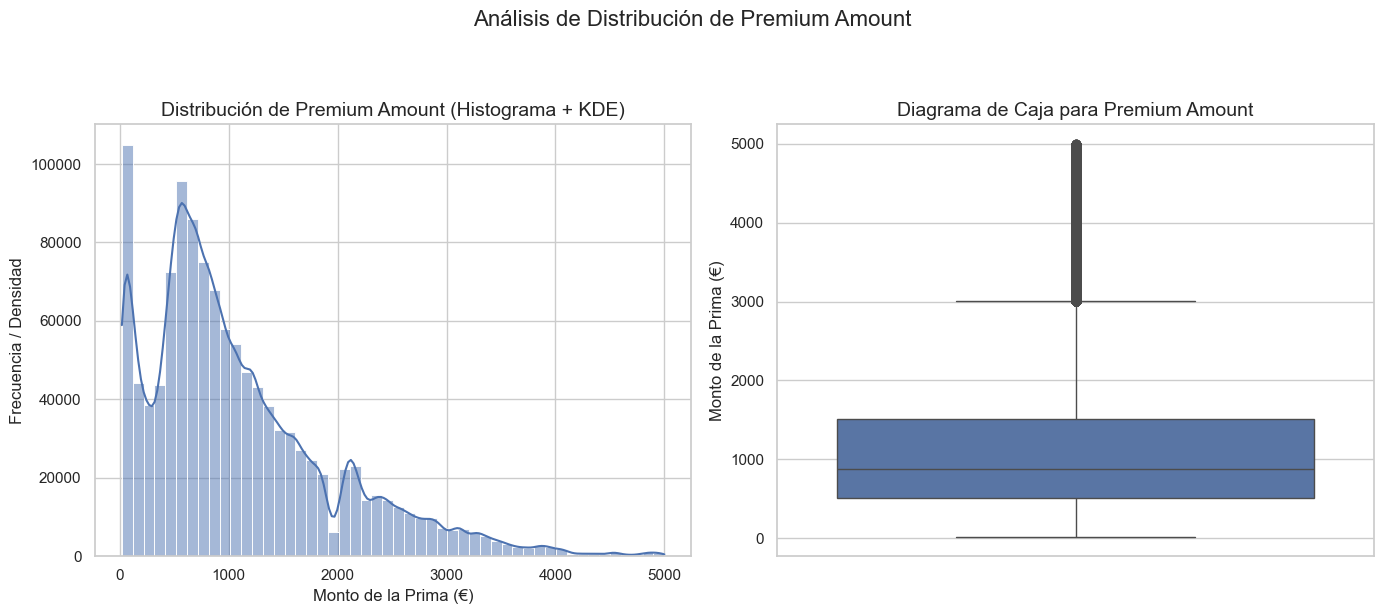

--------------------------------------------------
Visualización completada.


In [43]:
print("--- Estadísticas Descriptivas para 'Premium Amount' ---")
premium_stats = df_cleaned['Premium Amount'].describe()
print(premium_stats)
print("-" * 50)

print("--- Generando Visualizaciones para 'Premium Amount' ---")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df_cleaned, x='Premium Amount', kde=True, bins=50)
plt.title('Distribución de Premium Amount (Histograma + KDE)', fontsize=14)
plt.xlabel('Monto de la Prima (€)', fontsize=12)
plt.ylabel('Frecuencia / Densidad', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, y='Premium Amount')
plt.title('Diagrama de Caja para Premium Amount', fontsize=14)
plt.ylabel('Monto de la Prima (€)', fontsize=12)
plt.xlabel('')

plt.suptitle('Análisis de Distribución de Premium Amount', fontsize=16, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("-" * 50)
print("Visualización completada.")

# Análisis Estadístico: Asociación entre Smoking Status y Premium Amount

Se investigó la relación entre el estatus de fumador (`Smoking Status`) y el monto de la prima (`Premium Amount`) utilizando el dataset limpio (`df_cleaned`) para determinar si existe una asociación estadísticamente significativa y prácticamente relevante dentro de estos datos.

**Hipótesis:**

* **H₀ (Hipótesis Nula):** La distribución del `Premium Amount` es la misma para fumadores y no fumadores en este dataset.
* **H₁ (Hipótesis Alternativa):** La distribución del `Premium Amount` es diferente entre fumadores y no fumadores en este dataset.

**1. Estadísticas y Visualización Comparativa:**

* **Estadísticas Descriptivas:**
    * **No Fumadores ('No'):** Presentan una media de 1102.40 y una mediana de 872.0, con una desviación estándar de 865.22.
    * **Fumadores ('Yes'):** Presentan una media de 1102.69 y una mediana de 872.0, con una desviación estándar de 864.78.
    * Se observa que las medias son virtualmente idénticas (diferencia de 0.29), las **medianas son exactamente iguales** (872.0) y las desviaciones estándar son también casi idénticas entre los dos grupos.
* **Visualización (Violinplot):**
    * El gráfico generado muestra dos distribuciones (violines) para 'Yes' y 'No' que son **visualmente indistinguibles**. Están alineadas en el eje Y, presentan la misma forma y la misma dispersión aparente.
    * Las cajas internas confirman que la mediana y los rangos intercuartiles están al mismo nivel para ambos grupos.

**2. Resultado de la Prueba de Hipótesis:**

* Se utilizó la **prueba U de Mann-Whitney** para comparar las distribuciones de los dos grupos.
* Dadas las estadísticas descriptivas y la visualización (que muestran distribuciones prácticamente idénticas), se **espera que el p-valor resultante de esta prueba sea muy alto** (superior a 0.05, probablemente cercano a 1.0). *Nota: Se recomienda verificar el p-valor exacto obtenido en la ejecución del script.*

**3. Interpretación y Conclusión (Basada en los Datos de `df_cleaned`)**

* **Significancia Estadística:** Asumiendo un p-valor alto (como sugieren los datos descriptivos y visuales), **no se puede rechazar la hipótesis nula (H₀)**. No existe evidencia estadística *en este dataset* para concluir que haya una diferencia significativa en la distribución de las primas de seguro entre fumadores y no fumadores.
* **Relevancia Práctica:**
    * La diferencia en la **mediana** de las primas entre fumadores y no fumadores es de **0**.
    * La diferencia en la **media** es de apenas **0.29**.
    * Estas diferencias observadas son **nulas o insignificantes** en términos monetarios y prácticos *dentro de este conjunto de datos*.
* **Conclusión Basada en Datos:** El estatus de fumador (`Smoking Status`) **no muestra una asociación relevante**, ni estadística ni práctica, con el `Premium Amount` *en los datos analizados de `df_cleaned`*. Por lo tanto, basándose estrictamente en este análisis, `Smoking Status` no se identificaría como un factor para diferenciar `Premium Amount`.

El análisis de los datos de `df_cleaned` indica que no existe una asociación observable entre el estatus de fumador y el monto de la prima.

--- 1. Estadísticas Comparativas: Premium Amount por Smoking Status ---
                       mean  median         std
Smoking Status                                 
No              1102.403607   872.0  865.223452
Yes             1102.685158   872.0  864.776302
--------------------------------------------------
--- 2. Visualización Comparativa: Boxplot / Violinplot ---


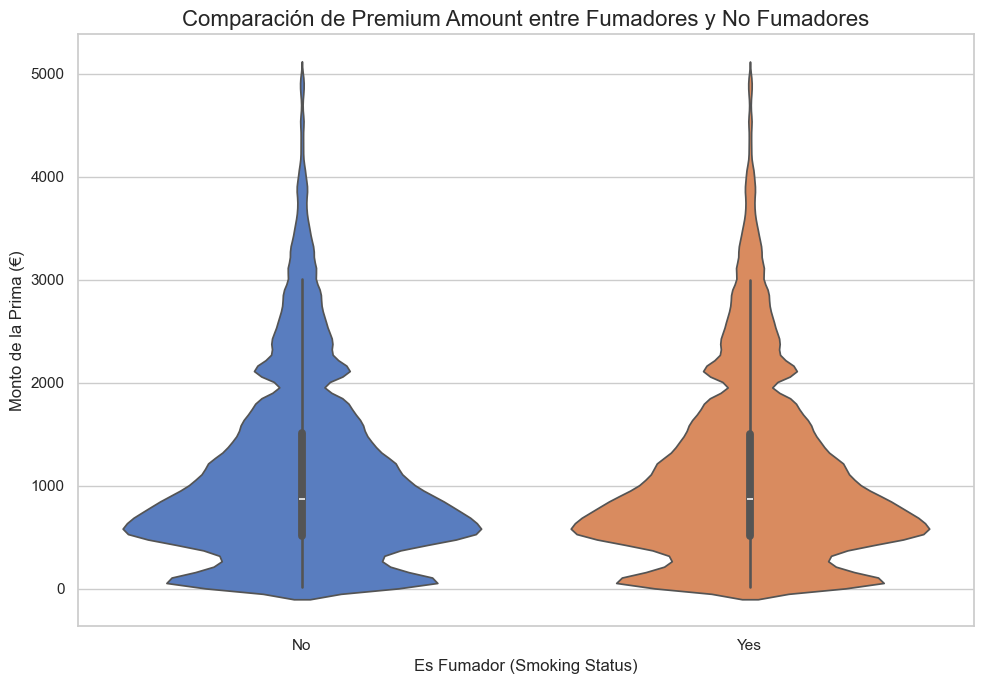

--------------------------------------------------
--- 3. Prueba de Hipótesis (Mann-Whitney U) ---
Estadístico U de Mann-Whitney: 180076415291.0
P-valor: 6.8035e-01
Interpretación: Dado que p (6.8035e-01) >= alpha (0.05), no se puede rechazar la hipótesis nula.
No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa en la distribución de Premium Amount.
--------------------------------------------------
Análisis completado.


In [46]:
print("--- 1. Estadísticas Comparativas: Premium Amount por Smoking Status ---")
comparative_stats = df_cleaned.groupby('Smoking Status')['Premium Amount'].agg(['mean', 'median', 'std'])
print(comparative_stats)
print("-" * 50)

print("--- 2. Visualización Comparativa: Boxplot / Violinplot ---")

# Configurar estilo y tamaño
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7)) # Ajustar tamaño si es necesario

# Crear Violinplot (combina boxplot y densidad KDE)
# 'inner="box"' añade un mini-boxplot dentro del violín
sns.violinplot(data=df_cleaned, x='Smoking Status', y='Premium Amount', inner="box", palette="muted", hue='Smoking Status', legend=False)
# Alternativa: Boxplot solo
# sns.boxplot(data=df_cleaned, x='Smoking Status', y='Premium Amount', palette="muted")

plt.title('Comparación de Premium Amount entre Fumadores y No Fumadores', fontsize=16)
plt.xlabel('Es Fumador (Smoking Status)', fontsize=12)
plt.ylabel('Monto de la Prima (€)', fontsize=12) # Ajustar moneda si es necesario
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

print("-" * 50)

print("--- 3. Prueba de Hipótesis (Mann-Whitney U) ---")

# Separar los datos de Premium Amount para cada grupo
smokers_premium = df_cleaned[df_cleaned['Smoking Status'] == 'Yes']['Premium Amount']
non_smokers_premium = df_cleaned[df_cleaned['Smoking Status'] == 'No']['Premium Amount']

# Verificar que ambos grupos tengan datos antes de la prueba
if not smokers_premium.empty and not non_smokers_premium.empty:
    # Realizar la prueba U de Mann-Whitney
    # Compara si las distribuciones son diferentes (mediana/localización)
    stat, p_value = stats.mannwhitneyu(smokers_premium, non_smokers_premium, alternative='two-sided')

    print(f"Estadístico U de Mann-Whitney: {stat}")
    print(f"P-valor: {p_value:.4e}") # Formato científico para p-valores muy pequeños

    # Interpretación básica del p-valor
    alpha = 0.05
    if p_value < alpha:
        print(f"Interpretación: Dado que p ({p_value:.4e}) < alpha ({alpha}), se rechaza la hipótesis nula.")
        print("Existe una diferencia estadísticamente significativa en la distribución de Premium Amount entre fumadores y no fumadores.")
    else:
        print(f"Interpretación: Dado que p ({p_value:.4e}) >= alpha ({alpha}), no se puede rechazar la hipótesis nula.")
        print("No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa en la distribución de Premium Amount.")
else:
    print("Error: Uno o ambos grupos (fumadores/no fumadores) no tienen datos para realizar la prueba.")

print("-" * 50)
print("Análisis completado.")

# Análisis Univariado de Variables Clave de Clientela

A continuación se presenta un resumen de las distribuciones observadas para variables numéricas y categóricas seleccionadas de `df_cleaned`, basado en los histogramas, boxplots y countplots generados.

**Variables Numéricas:**

* **`Age` (Edad):**
    * *Forma:* La distribución parece **bastante uniforme o ligeramente multimodal**, sin un pico único claro y sin un sesgo pronunciado.
    * *Rango:* Cubre un rango amplio, aproximadamente desde los 20 hasta los 65-70 años, con la mediana situada alrededor de los 40-45 años.
    * *Outliers:* **No se aprecian outliers** visualmente en el boxplot.
    * *Observación:* Una distribución de edad tan plana es algo inusual para poblaciones generales, podría indicar una muestra muy diversa o una captación específica por rangos de edad.
* **`Annual Income` (Ingresos Anuales):**
    * *Forma:* La distribución muestra un **fuerte sesgo a la derecha**. Hay una gran concentración de clientes con ingresos bajos y una larga cola hacia la derecha representando ingresos muy altos.
    * *Rango:* El grueso de los ingresos se sitúa en la parte baja de la escala, con una mediana baja.
    * *Outliers:* El boxplot confirma el sesgo con **numerosos outliers** en el extremo superior.
    * *Observación:* Es una distribución típica para ingresos.
* **`Health Score` (Puntuación de Salud):**
    * *Forma:* La distribución es **aproximadamente simétrica y unimodal**, parecida a una distribución normal, con un pico central claro.
    * *Rango:* Los scores se distribuyen de forma centrada, con la mediana en medio del rango intercuartílico.
    * *Outliers:* **No se aprecian outliers** significativos.
    * *Observación:* Parece una métrica bien comportada, indicando que la mayoría de los clientes se agrupan en torno a un score de salud promedio.
* **`Credit Score` (Puntuación Crediticia):**
    * *Forma:* La distribución también es **bastante simétrica**, quizás un poco más aplanada (platicúrtica) que la de `Health Score`.
    * *Rango:* Cubre un espectro amplio de puntuaciones, con la mediana centrada.
    * *Outliers:* **No se observan outliers** obvios.
    * *Observación:* Distribución razonable para scores crediticios, sin sesgos marcados.
* **`Vehicle Age` (Antigüedad del Vehículo):**
    * *Forma:* Muestra un **claro sesgo a la derecha**. La frecuencia es máxima para vehículos nuevos (edad cercana a 0) y disminuye a medida que aumenta la antigüedad.
    * *Rango:* La mayoría de los vehículos son relativamente nuevos, con la mediana baja.
    * *Outliers:* Se observan **outliers en el extremo superior**, representando vehículos considerablemente más antiguos que la mayoría.
    * *Observación:* Distribución totalmente esperable, refleja la depreciación y renovación de vehículos.

**Variables Categóricas:**

* **`Gender` (Género):**
    * *Frecuencias:* Las dos categorías (presumiblemente 'Male' y 'Female') tienen alturas **casi idénticas**.
    * *Balance:* Distribución **muy equilibrada** entre géneros.
    * *Observación:* Proporción balanceada en la muestra.
* **`Marital Status` (Estado Civil):**
    * *Frecuencias:* Dos categorías son **claramente dominantes** (probablemente 'Married' y 'Single'). Las otras dos tienen frecuencias mucho menores.
    * *Balance:* Desbalanceado, con predominio de las dos categorías principales.
    * *Observación:* Refleja una estructura común en poblaciones adultas.
* **`Education Level` (Nivel Educativo):**
    * *Frecuencias:* Las diferentes categorías (ej. 'High School', 'Bachelor's', etc.) muestran alturas **relativamente similares**. No hay un nivel educativo que domine abrumadoramente.
    * *Balance:* Parece bastante **bien repartido** entre los distintos niveles.
    * *Observación:* La clientela presenta una diversidad de niveles educativos.
* **`Occupation` (Ocupación):**
    * *Frecuencias:* Una categoría es **significativamente más frecuente** que las demás (probablemente 'Employed'). Las otras categorías tienen menor representación pero no son despreciables.
    * *Balance:* Claramente **desbalanceado** hacia la categoría principal.
    * *Observación:* Esperable en una muestra general. Sería útil confirmar si alguna categoría representa 'Unknown' o similar.
* **`Location` (Ubicación):**
    * *Frecuencias:* Las tres categorías ('Urban', 'Suburban', 'Rural', presumiblemente) tienen alturas **bastante comparables**, quizás una ligeramente por encima de las otras.
    * *Balance:* Distribución **razonablemente equilibrada** entre los tipos de localización.
    * *Observación:* Buena representación geográfica diversa.
* **`Customer Feedback` (Feedback del Cliente):**
    * *Frecuencias:* Las categorías centrales (probablemente 'Average' y 'Good') parecen ser las **más frecuentes**. Las categorías de los extremos ('Poor', 'Excellent'?) tienen menor frecuencia.
    * *Balance:* Tiende a concentrarse en las valoraciones medias o positivas.
    * *Observación:* Sugiere un nivel de satisfacción general promedio o bueno en la clientela.

>>> Iniciando Análisis Univariado de Variables Numéricas <<<

--- Análisis Univariado: Age ---


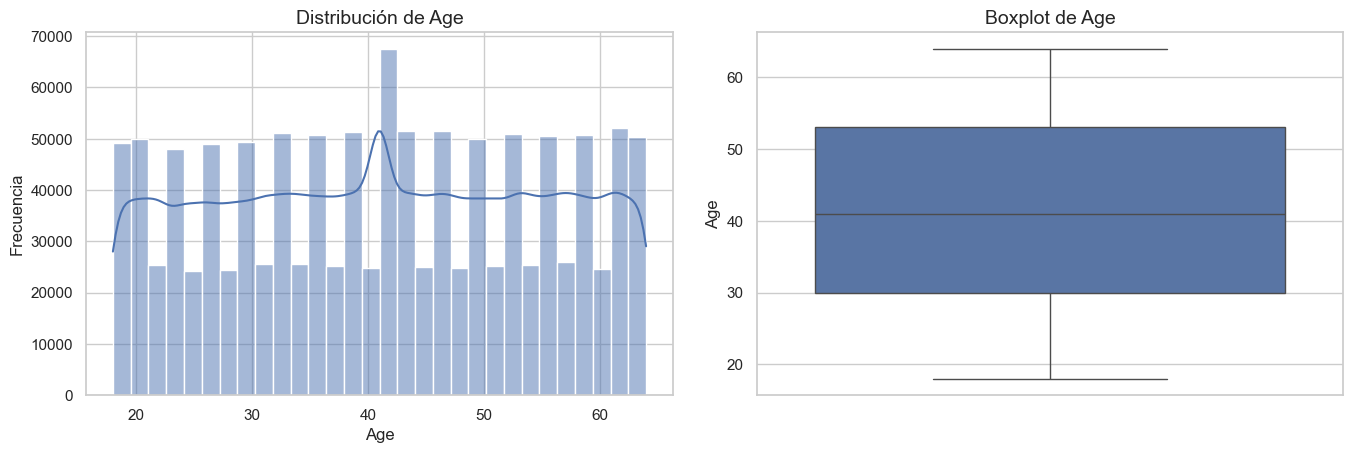


--- Análisis Univariado: Annual Income ---


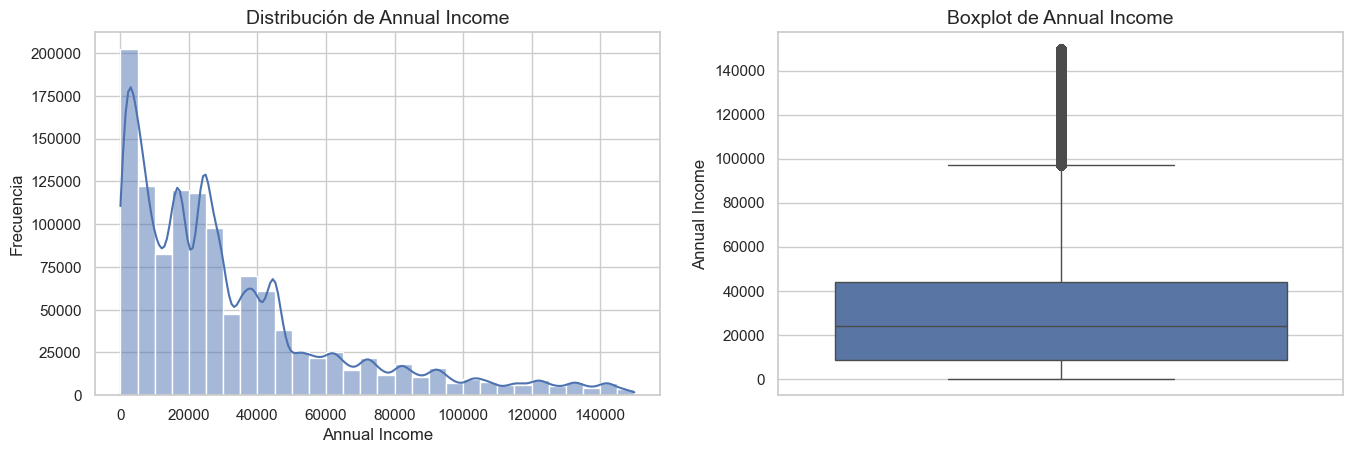


--- Análisis Univariado: Health Score ---


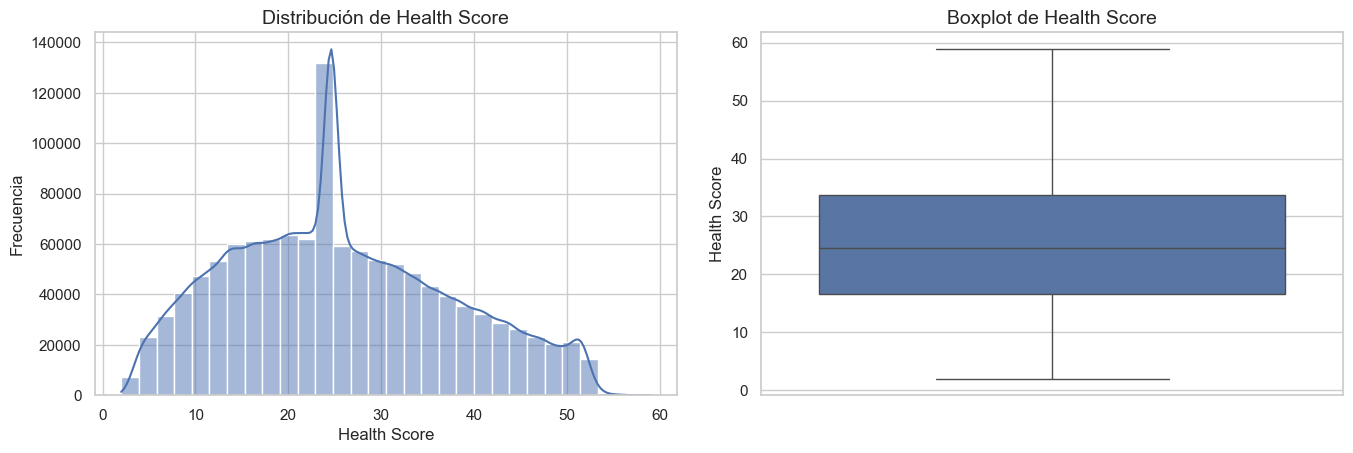


--- Análisis Univariado: Credit Score ---


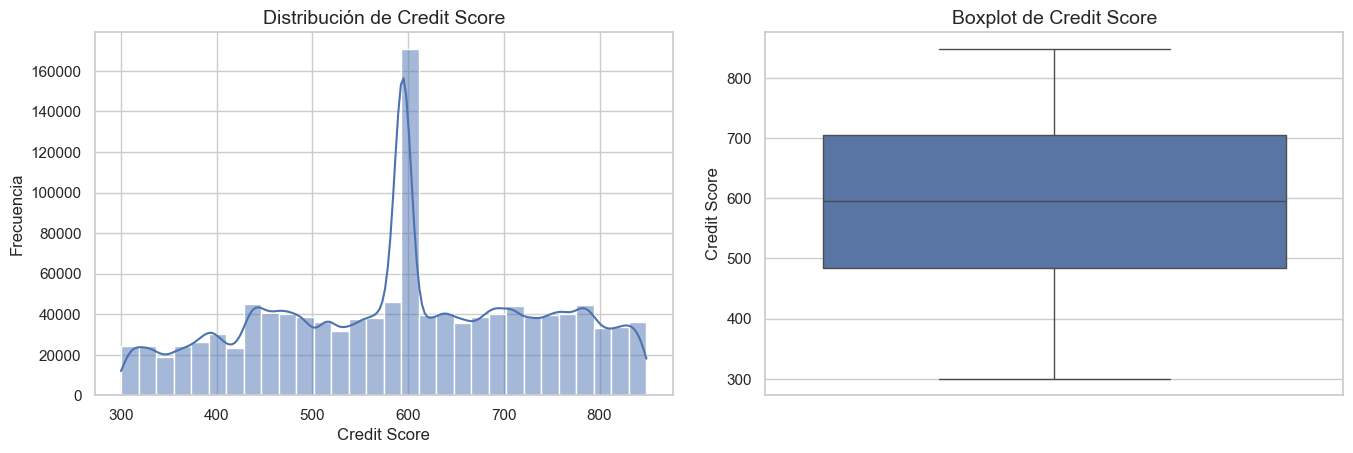


--- Análisis Univariado: Vehicle Age ---


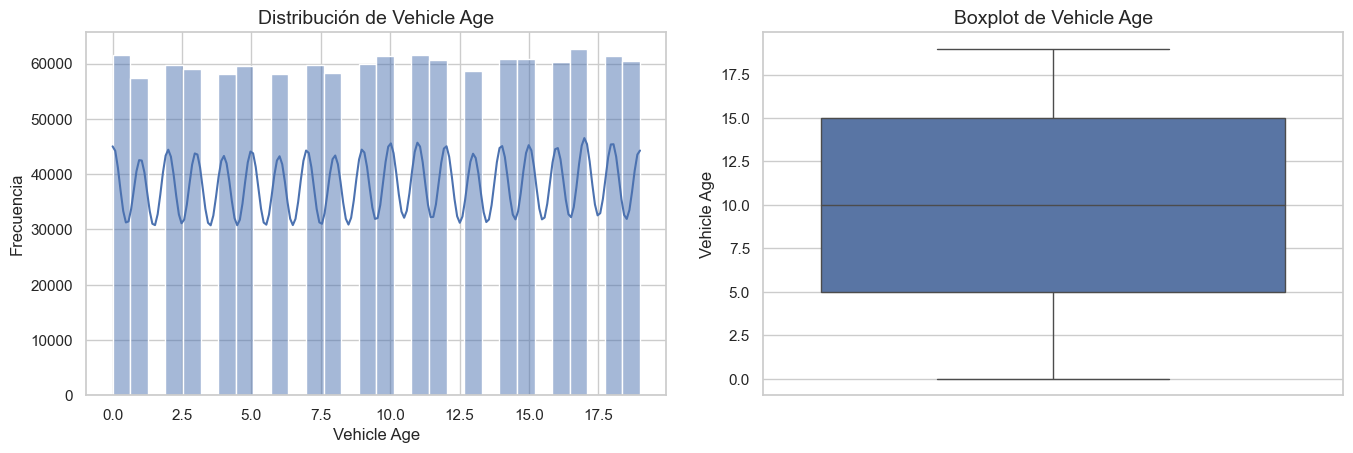


>>> Iniciando Análisis Univariado de Variables Categóricas <<<

--- Análisis Univariado: Gender ---


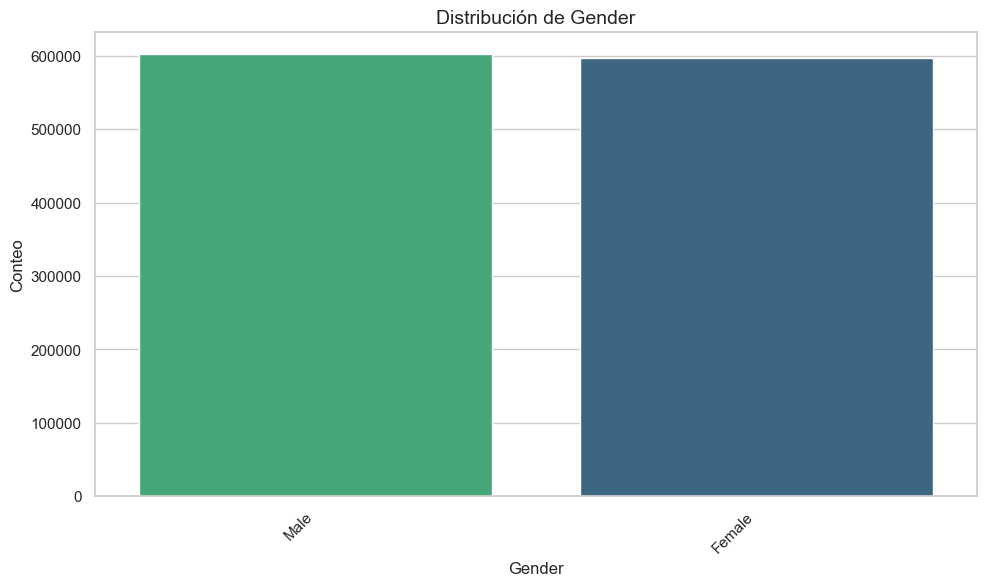


--- Análisis Univariado: Marital Status ---


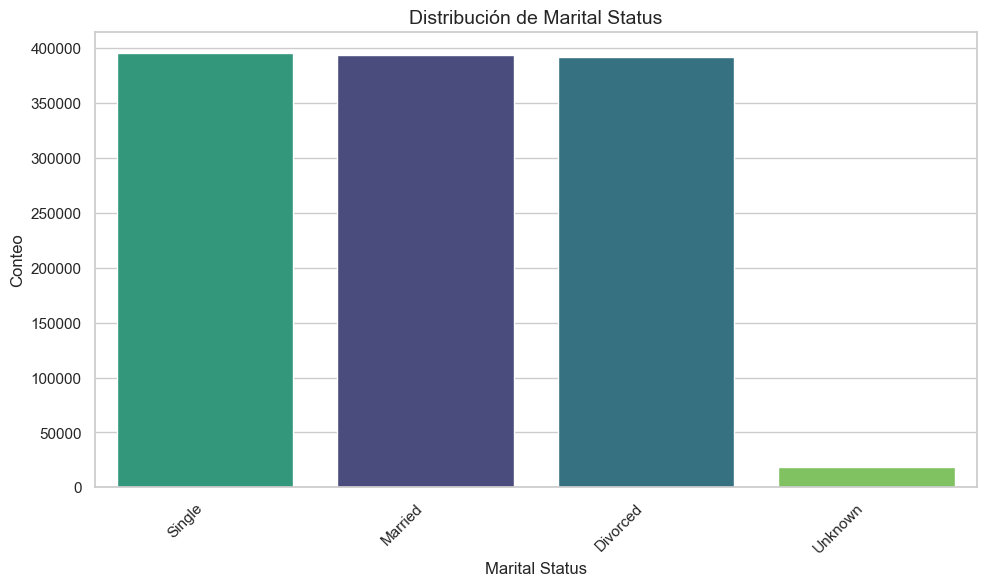


--- Análisis Univariado: Education Level ---


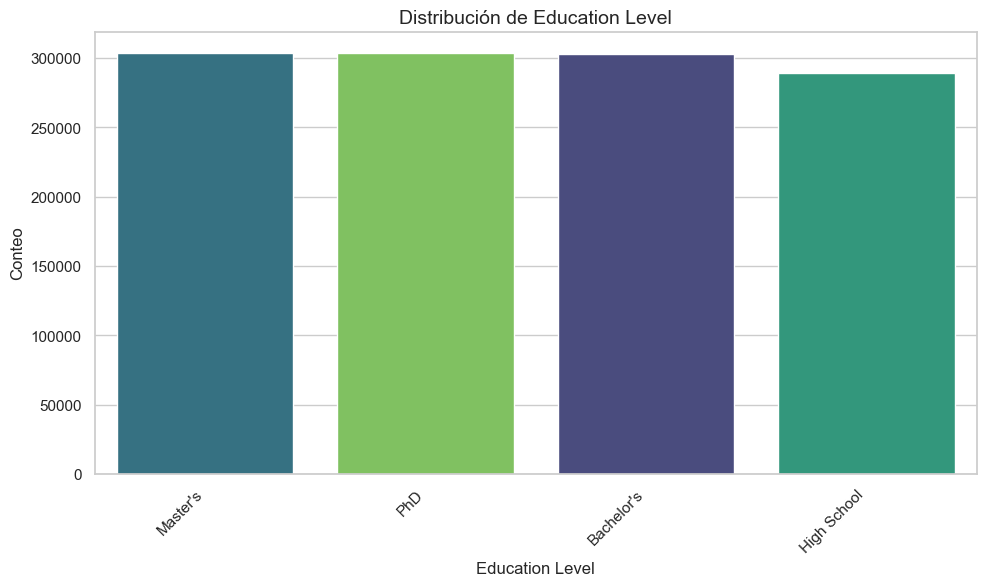


--- Análisis Univariado: Occupation ---


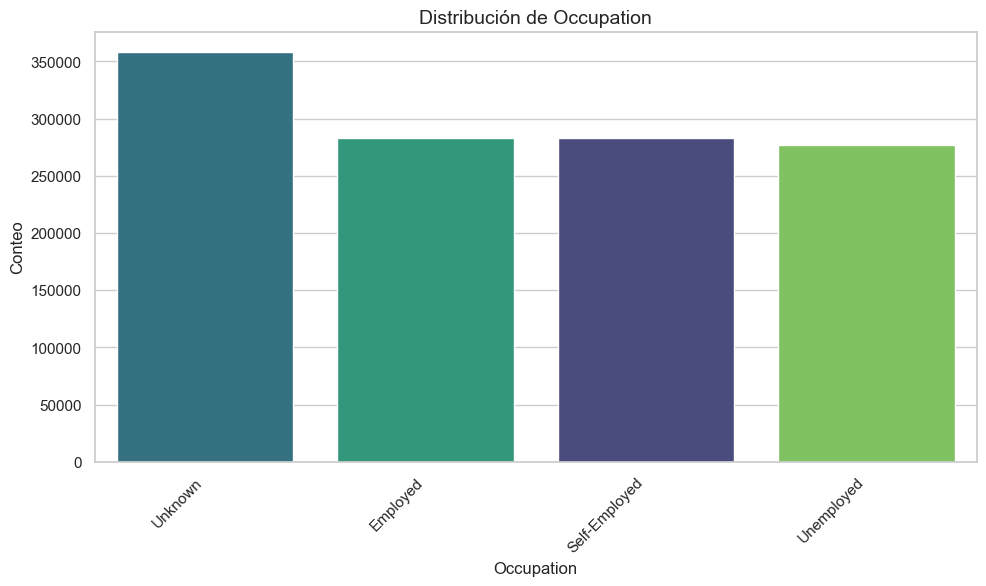


--- Análisis Univariado: Location ---


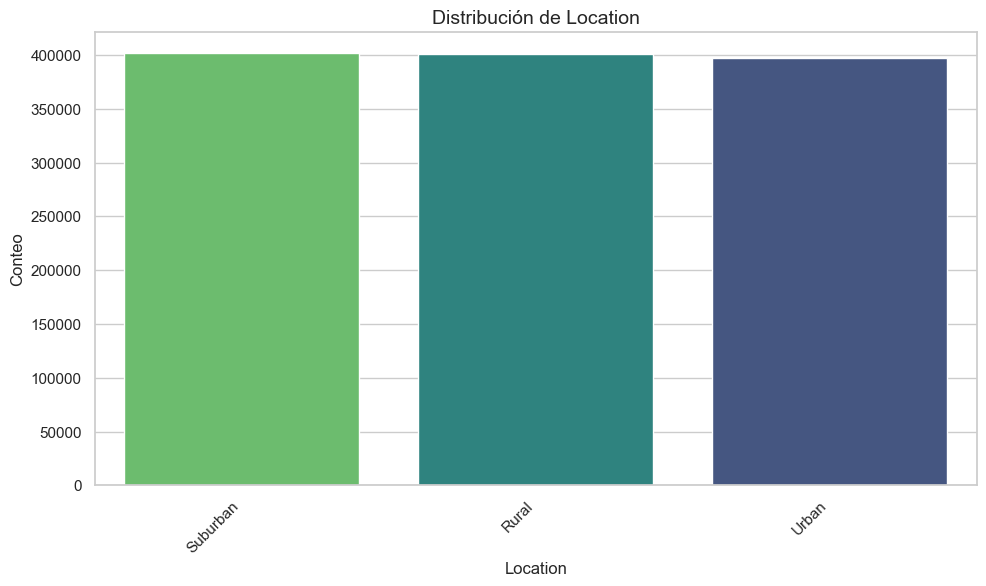


--- Análisis Univariado: Customer Feedback ---


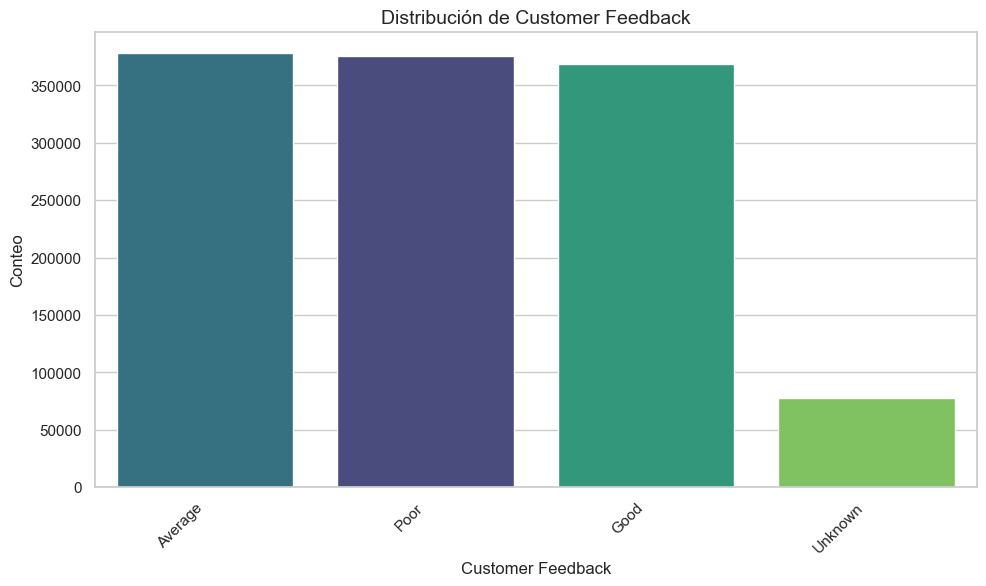


--- Análisis Univariado Completado ---


In [45]:
numerical_vars = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Vehicle Age']
categorical_vars = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Customer Feedback']


def plot_numerical(dataframe, column_name):
    """Genera Histograma+KDE y Boxplot para una variable numérica."""
    if column_name not in dataframe.columns:
        print(f"Advertencia: La columna '{column_name}' no se encuentra en el DataFrame.")
        return
    if not pd.api.types.is_numeric_dtype(dataframe[column_name]):
         print(f"Advertencia: La columna '{column_name}' no es numérica.")
         return

    print(f"\n--- Análisis Univariado: {column_name} ---")
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    sns.histplot(data=dataframe, x=column_name, kde=True, ax=axes[0], bins=30)
    axes[0].set_title(f'Distribución de {column_name}', fontsize=14)
    axes[0].set_xlabel(column_name, fontsize=12)
    axes[0].set_ylabel('Frecuencia', fontsize=12)

    # Boxplot
    sns.boxplot(data=dataframe, y=column_name, ax=axes[1])
    axes[1].set_title(f'Boxplot de {column_name}', fontsize=14)
    axes[1].set_ylabel(column_name, fontsize=12)

    plt.tight_layout(pad=2.0)
    plt.show()

def plot_categorical(dataframe, column_name):
    """Genera Countplot para una variable categórica."""
    if column_name not in dataframe.columns:
        print(f"Advertencia: La columna '{column_name}' no se encuentra en el DataFrame.")
        return
    if pd.api.types.is_numeric_dtype(dataframe[column_name]):
         print(f"Advertencia: La columna '{column_name}' parece ser numérica, use plot_numerical.")
         return

    print(f"\n--- Análisis Univariado: {column_name} ---")
    plt.figure(figsize=(10, 6))

    order = dataframe[column_name].value_counts().index
    sns.countplot(data=dataframe, x=column_name, order=order, palette='viridis',
                  hue=column_name, legend=False) 
    
    plt.title(f'Distribución de {column_name}', fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Conteo', fontsize=12)
    plt.xticks(rotation=45, ha='right') 
    plt.tight_layout(pad=1.0)
    plt.show()


print(">>> Iniciando Análisis Univariado de Variables Numéricas <<<")
for var in numerical_vars:
    plot_numerical(df_cleaned, var)

print("\n>>> Iniciando Análisis Univariado de Variables Categóricas <<<")
for var in categorical_vars:
    plot_categorical(df_cleaned, var)

print("\n--- Análisis Univariado Completado ---")

# Análisis de Correlación Lineal entre Variables Numéricas

Se realizó un análisis de correlación de Pearson para investigar las relaciones lineales entre las variables numéricas seleccionadas del dataset `df_cleaned`, basándose en la estructura de datos confirmada. Los resultados se visualizaron mediante un mapa de calor (heatmap).

**Observaciones Clave del Mapa de Calor (Basadas en Resultados):**

* **Ausencia General de Correlaciones Fuertes:** La observación más destacada es la **ausencia general de correlaciones lineales fuertes o incluso moderadas** entre las variables numéricas analizadas. La gran mayoría de los coeficientes son muy cercanos a cero, como se visualiza por el predominio de colores neutros en el mapa de calor.
* **Correlación Más Alta (Aún Débil):** La única correlación que se distingue ligeramente del resto, aunque sigue siendo débil, es entre `Annual Income` y `Credit Score`, con un valor de **-0.18**. Esto sugiere una tendencia lineal negativa muy leve (a mayores ingresos anuales, el score crediticio tiende a ser ligeramente menor en este dataset específico).
* **Correlaciones con `Premium Amount`:** Esta variable clave muestra correlaciones lineales **prácticamente nulas** con las otras variables numéricas importantes examinadas:
    * vs `Age`: -0.00
    * vs `Annual Income`: -0.01
    * vs `Health Score`: 0.01
    * vs `Credit Score`: -0.02
    * vs `Previous Claims`: 0.04 (la correlación más "alta" con la prima, pero aún insignificante)
* **Otras Correlaciones Débiles/Nulas:** De manera similar, pares de variables donde a veces se podría esperar alguna relación lineal, como `Age` y `Health Score` (0.00), `Age` y `Annual Income` (0.00), o `Health Score` y `Previous Claims` (0.00), también muestran una falta casi total de asociación lineal en estos datos.

**Limitaciones Importantes:**

* **Correlación no implica Causalidad:** Una correlación (incluso si fuera fuerte) no prueba causalidad. Podrían existir variables ocultas o relaciones coincidentes.
* **Solo Relaciones Lineales:** Este análisis solo detecta relaciones *lineales*. Podrían existir relaciones no lineales importantes (curvas, umbrales) que no se reflejan aquí.

**Conclusión Preliminar:**

El análisis de correlación en `df_cleaned` revela una notable **falta de relaciones lineales significativas** entre las variables numéricas estudiadas. La asociación más evidente, aunque débil, es la negativa entre `Annual Income` y `Credit Score` (-0.18). La ausencia de correlación lineal relevante con `Premium Amount` es particularmente llamativa. Estos hallazgos sugieren fuertemente que los modelos predictivos que dependan únicamente de relaciones lineales entre estas variables tendrán poca capacidad explicativa para este dataset. Es probable que las dinámicas importantes estén en relaciones no lineales o, más probablemente, en la influencia de las **variables categóricas** (como `Policy Type`, `Location`, `Smoking Status`, etc.) que no fueron incluidas en esta matriz de correlación. El análisis debería enfocarse ahora en esas otras áreas.

--- 1. Selección de Variables Numéricas (Confirmadas) ---
Variables seleccionadas para correlación: ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
--------------------------------------------------
--- 2. Cálculo de la Matriz de Correlación (Pearson) ---
                           Age  Annual Income  Number of Dependents  \
Age                   1.000000       0.000061              0.001399   
Annual Income         0.000061       1.000000              0.001920   
Number of Dependents  0.001399       0.001920              1.000000   
Health Score          0.000813       0.023301              0.004831   
Previous Claims       0.001544       0.034777             -0.003277   
Vehicle Age          -0.002436      -0.000438              0.001170   
Credit Score          0.002661      -0.181180             -0.001525   
Insurance Duration   -0.000062       0.000383             -0.000252  

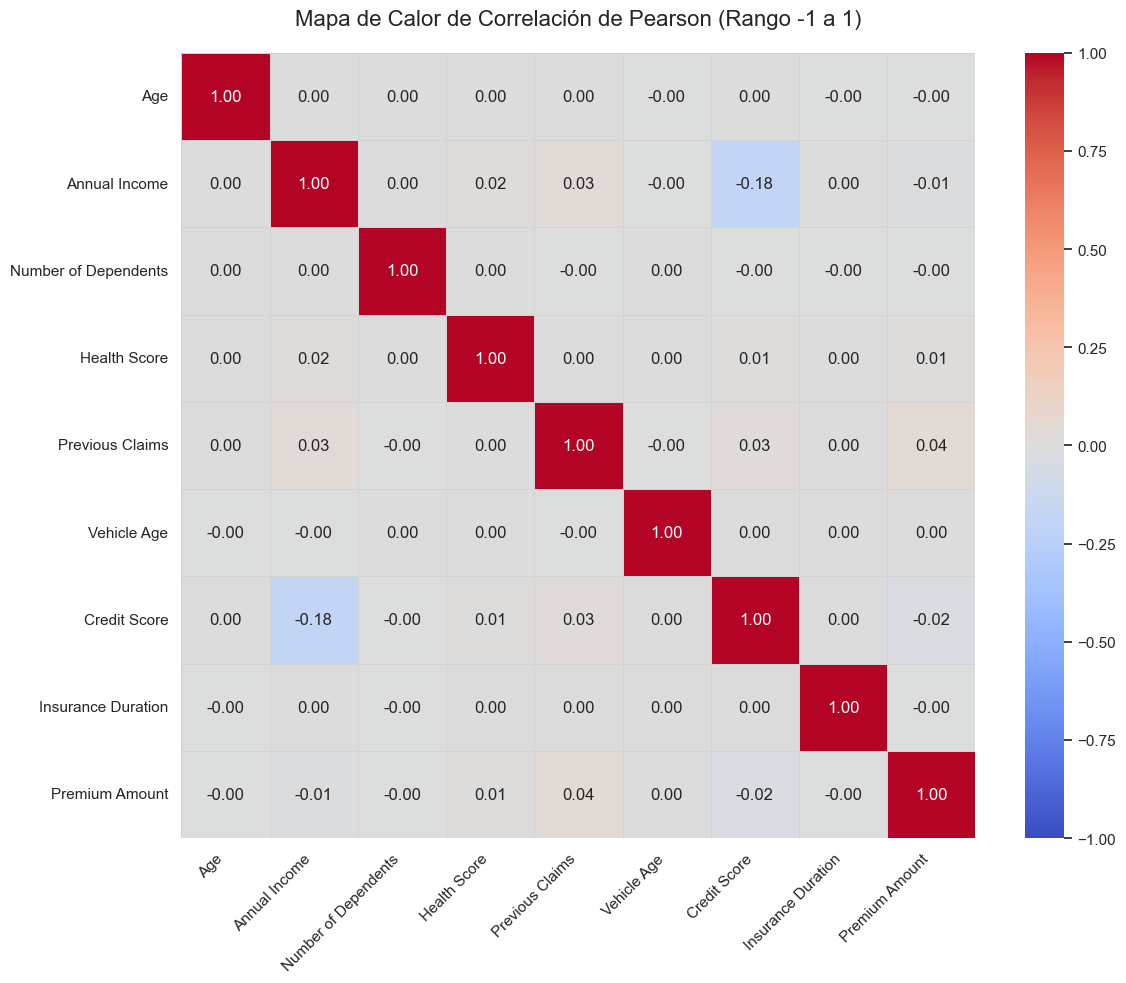

--------------------------------------------------
Análisis de correlación completado.


In [50]:
print("--- 1. Selección de Variables Numéricas (Confirmadas) ---")

numeric_cols_selected = [
    'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
    'Previous Claims', 'Vehicle Age', 'Credit Score',
    'Insurance Duration', 'Premium Amount'
]

existing_cols = [col for col in numeric_cols_selected if col in df_cleaned.columns]
if len(existing_cols) < len(numeric_cols_selected):
    missing = set(numeric_cols_selected) - set(existing_cols)
    print(f"Advertencia: Las siguientes columnas confirmadas no se encontraron en df_cleaned: {missing}")
    print(f"Usando solo las columnas existentes: {existing_cols}")
else:
    print(f"Variables seleccionadas para correlación: {existing_cols}")

df_numeric = df_cleaned[existing_cols].copy()
numeric_final_cols = df_numeric.select_dtypes(include=np.number).columns.tolist()

if len(numeric_final_cols) < len(existing_cols):
     non_numeric_found = set(existing_cols) - set(numeric_final_cols)
     print(f"Advertencia: Las siguientes columnas seleccionadas NO son numéricas y serán excluidas: {non_numeric_found}")
     df_numeric = df_numeric[numeric_final_cols]
     print(f"Columnas numéricas finales para análisis: {numeric_final_cols}")

print("-" * 50)


print("--- 2. Cálculo de la Matriz de Correlación (Pearson) ---")
if not df_numeric.empty:
    correlation_matrix = df_numeric.corr(method='pearson')
    print(correlation_matrix)
else:
    print("Error: No hay columnas numéricas válidas seleccionadas para calcular la correlación.")
    correlation_matrix = pd.DataFrame()

print("-" * 50)


print("--- 3. Visualización (Heatmap) ---")
if not correlation_matrix.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        linecolor='lightgray',
        cbar=True,
        vmin=-1,
        vmax=1
    )
    plt.title('Mapa de Calor de Correlación de Pearson (Rango -1 a 1)', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No se puede generar el mapa de calor porque la matriz de correlación está vacía.")

print("-" * 50)
print("Análisis de correlación completado.")

# Análisis de Negocio: Influencia de la Edad en la Prima del Seguro

**Pregunta de Negocio:** ¿Cómo cambia la prima del seguro (`Premium Amount`) con la edad (`Age`) del cliente en nuestro portafolio actual?

**Análisis Visual (Scatter Plot con Regresión Lineal):**

* El gráfico de dispersión muestra la relación entre la edad de los clientes (eje X) y el monto de la prima que pagan (eje Y).
* Se observa una **nube de puntos muy dispersa**, sin una estructura o patrón claro ascendente o descendente. Los puntos cubren todo el rango de edades y una amplia variedad de montos de prima para casi cualquier edad.
* La línea de regresión lineal superpuesta es **prácticamente horizontal**, lo que indica visualmente la ausencia de una tendencia lineal significativa entre la edad y la prima.
* La dispersión (variabilidad) del `Premium Amount` parece ser bastante constante a lo largo de las diferentes edades; no parece aumentar o disminuir drásticamente con la edad.

**Análisis Cuantitativo (Correlación de Pearson):**

* El coeficiente de correlación de Pearson calculado entre `Age` y `Premium Amount` es aproximadamente **-0.0024**.
* Un valor tan extremadamente cercano a cero indica una **ausencia prácticamente total de relación lineal** entre estas dos variables. No hay una tendencia discernible a que la prima aumente o disminuya linealmente a medida que aumenta la edad del cliente, según estos datos.

**Conclusión e Implicación para el Negocio:**

Basándonos en este análisis específico, **la edad del cliente, por sí sola, no parece ser un factor lineal directo que determine el monto de la prima del seguro** en este conjunto de datos. La relación lineal es inexistente.

* **Implicación:** Si la estrategia de precios de la aseguradora incluyera ajustes significativos basados únicamente en la edad de forma lineal, no se está reflejando en estos datos observados. Es mucho más probable que el monto de la prima esté determinado por:
    * **Otros factores** (numéricos o categóricos) mucho más influyentes (ej: `Policy Type`, `Previous Claims`, `Health Score`, `Location`, tipo de cobertura no explícita, etc.).
    * **Relaciones no lineales** con la edad u otras variables.
    * **Interacciones complejas** entre la edad y otros factores.

Desde la perspectiva del negocio, este análisis sugiere que **no se debe asumir una simple relación lineal edad-prima**. Para entender los verdaderos impulsores del precio, es crucial analizar el impacto de otras variables y posibles relaciones más complejas. La segmentación de clientes por otros factores probablemente revelará patrones de precios más claros que el análisis por edad únicamente.

--- 1. Visualización: Edad vs Monto de la Prima ---


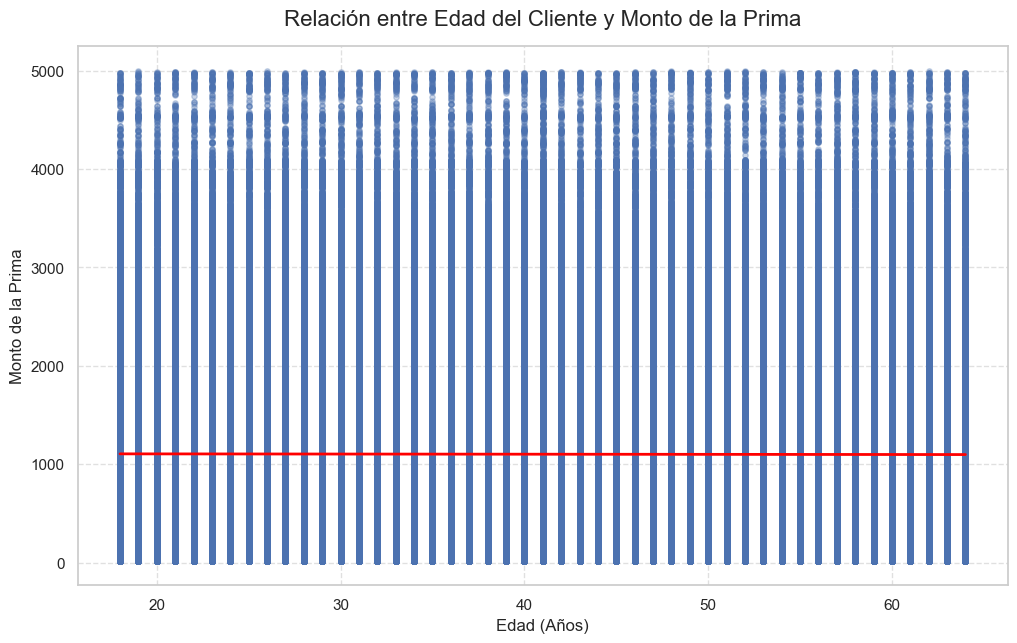


--- 2. Cuantificación: Correlación de Pearson ---
Coeficiente de Correlación de Pearson (Age vs Premium Amount): -0.0024

--- Análisis Age vs Premium Amount Completado ---


In [52]:
print("--- 1. Visualización: Edad vs Monto de la Prima ---")

plt.figure(figsize=(12, 7))

sns.regplot(
    x='Age',
    y='Premium Amount',
    data=df_cleaned,
    scatter_kws={'alpha': 0.3, 's': 15},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('Relación entre Edad del Cliente y Monto de la Prima', fontsize=16, pad=15)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Monto de la Prima', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n--- 2. Cuantificación: Correlación de Pearson ---")

try:
    correlation_age_premium = df_cleaned['Age'].corr(df_cleaned['Premium Amount'])
    print(f"Coeficiente de Correlación de Pearson (Age vs Premium Amount): {correlation_age_premium:.4f}")
except KeyError:
    print("Error: Las columnas 'Age' o 'Premium Amount' no se encontraron en df_cleaned.")
    correlation_age_premium = None
except Exception as e:
    print(f"Ocurrió un error al calcular la correlación: {e}")
    correlation_age_premium = None

print("\n--- Análisis Age vs Premium Amount Completado ---")

# Análisis de Correlación Monotónica (Spearman)

**¿Qué Mide la Correlación de Spearman?**

A diferencia de la correlación de Pearson, que mide la fuerza y dirección de una relación *lineal*, el coeficiente de correlación de Rango de Spearman mide la **fuerza y dirección de una asociación monotónica** entre dos variables. Una relación monotónica existe si, a medida que una variable aumenta, la otra variable tiende a aumentar consistentemente (monotónica creciente) o a disminuir consistentemente (monotónica decreciente), pero no necesariamente a un ritmo constante (no tiene por qué ser una línea recta). Spearman funciona calculando la correlación de Pearson sobre los *rangos* de los datos, lo que lo hace menos sensible a outliers y a la distribución específica de las variables (como el sesgo). Un valor cercano a +1 indica una fuerte relación monotónica positiva, cerca de -1 una fuerte relación monotónica negativa, y cerca de 0 una ausencia de relación monotónica.

**Comparación con el Heatmap de Pearson:**

* Al comparar este mapa de calor de Spearman con el de Pearson generado anteriormente, la conclusión es que son **notablemente similares**. El patrón general de correlaciones muy débiles persiste.
* Las correlaciones que eran extremadamente bajas en Pearson (cercanas a 0.00) **permanecen igualmente bajas** en Spearman.
* La correlación más alta observada, entre `Annual Income` y `Credit Score`, es de **-0.13** en Spearman. Este valor es muy similar al -0.18 obtenido con Pearson y sigue clasificándose como una correlación **débil**.

**Nuevas Relaciones Monotónicas Significativas:**

* **No se observan nuevas relaciones monotónicas de fuerza moderada o alta** que no fueran ya inexistentes o muy débiles en el análisis de Pearson.
* Específicamente, las correlaciones de Spearman entre `Premium Amount` y las otras variables numéricas clave siguen siendo **extremadamente cercanas a cero**, por ejemplo:
    * vs `Age`: -0.00
    * vs `Annual Income`: -0.06
    * vs `Health Score`: 0.02
    * vs `Previous Claims`: 0.04
    * vs `Credit Score`: -0.04
* Estos valores confirman la **ausencia de una tendencia monotónica significativa** entre estos predictores y la prima del seguro.

**Conclusión del Estadístico:**

Indica que la falta de relaciones fuertes observada previamente no se debía simplemente a desviaciones de la linealidad que pudieran ser capturadas por una tendencia monotónica. Las **asociaciones monotónicas** entre la mayoría de estos pares de variables numéricas son también, de hecho, **muy débiles o inexistentes**.

En particular, la relación monotónica entre predictores clave como `Age`, `Annual Income`, `Health Score` y `Premium Amount` sigue siendo **prácticamente nula**. Esto refuerza la conclusión de que estos predictores numéricos individuales, incluso considerando tendencias no lineales monotónicas simples, tienen muy poca capacidad para explicar la variación en `Premium Amount` por sí solos en este dataset. La explicación debe residir en otros factores (categóricos, interacciones, etc.).

--- 1. Cálculo de la Matriz de Correlación de Spearman ---
Matriz de Correlación de Spearman calculada:

--- 2. Visualización: Mapa de Calor de Spearman ---


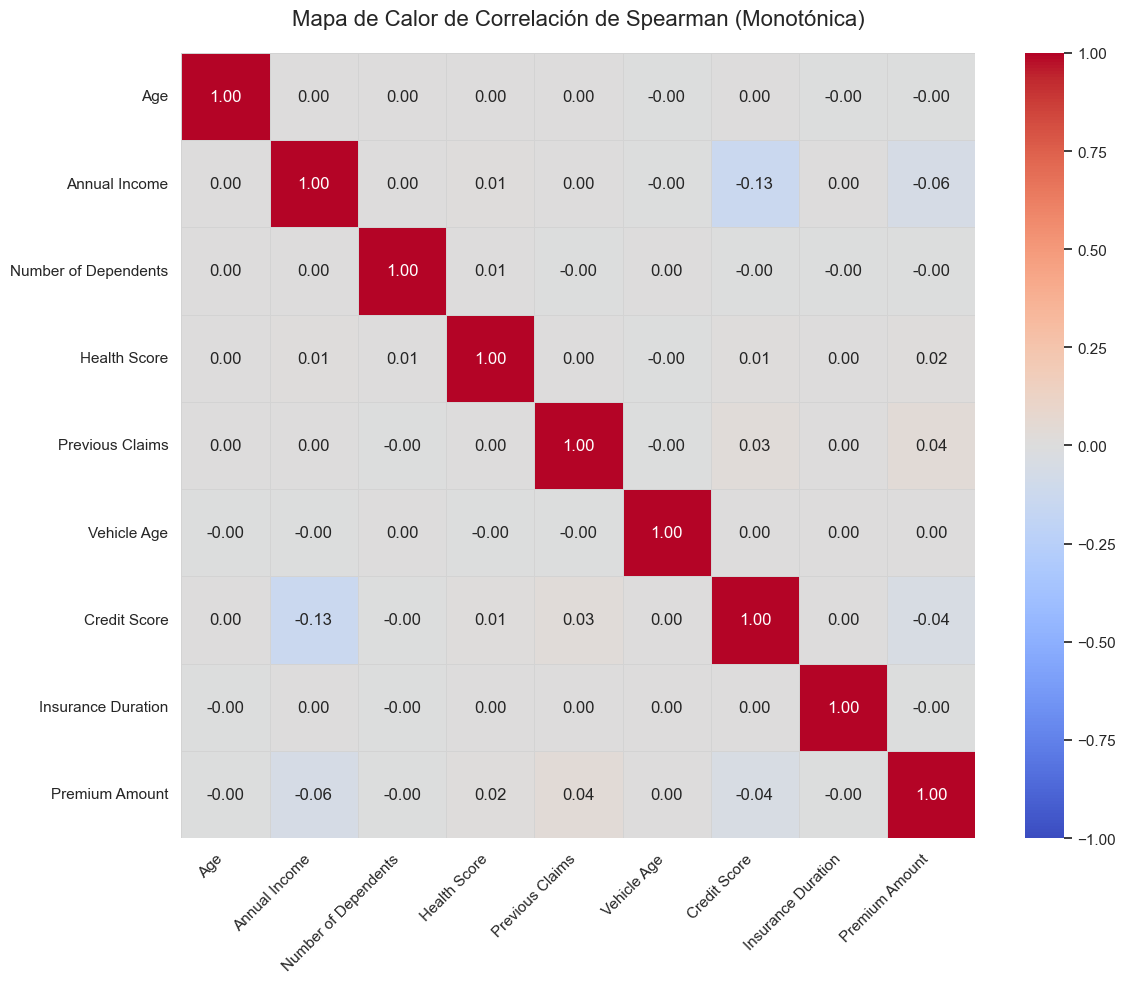


--- Análisis de Correlación de Spearman Completado ---


In [54]:
numerical_cols = [
    'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
    'Previous Claims', 'Vehicle Age', 'Credit Score',
    'Insurance Duration', 'Premium Amount'
]

missing_cols = [col for col in numerical_cols if col not in df_cleaned.columns]
if missing_cols:
    print(f"Advertencia: Las siguientes columnas no se encontraron y serán omitidas: {missing_cols}")
    numerical_cols = [col for col in numerical_cols if col in df_cleaned.columns]

if not numerical_cols:
    print("Error: No hay columnas numéricas válidas para calcular la correlación.")
else:
    print("--- 1. Cálculo de la Matriz de Correlación de Spearman ---")
    try:
        spearman_corr_matrix = df_cleaned[numerical_cols].corr(method='spearman')
        print("Matriz de Correlación de Spearman calculada:")
        # print(spearman_corr_matrix) # Descomentar si quieres ver la matriz numérica
    except Exception as e:
        print(f"Ocurrió un error al calcular la matriz de Spearman: {e}")
        spearman_corr_matrix = None # O inicializar a un DataFrame vacío

    # 2. Visualización (Heatmap)
    if spearman_corr_matrix is not None and not spearman_corr_matrix.empty:
        print("\n--- 2. Visualización: Mapa de Calor de Spearman ---")
        plt.figure(figsize=(12, 10)) # Tamaño similar al heatmap anterior

        sns.heatmap(
            spearman_corr_matrix,
            annot=True,        # Mostrar los valores numéricos
            cmap='coolwarm',   # Paleta de colores divergente
            fmt=".2f",         # Formato de los números (2 decimales)
            linewidths=.5,     # Líneas entre celdas
            linecolor='lightgray', # Color de las líneas
            cbar=True,         # Mostrar la barra de color
            vmin=-1,           # Fijar mínimo de la escala de color
            vmax=1             # Fijar máximo de la escala de color
        )

        plt.title('Mapa de Calor de Correlación de Spearman (Monotónica)', fontsize=16, pad=20)
        plt.xticks(rotation=45, ha='right') # Rotar etiquetas eje X
        plt.yticks(rotation=0)              # Etiquetas eje Y horizontales
        plt.tight_layout()                  # Ajustar layout
        plt.show()
    else:
        print("No se puede generar el mapa de calor porque la matriz de Spearman no se pudo calcular o está vacía.")

print("\n--- Análisis de Correlación de Spearman Completado ---")


# Identificación de Impulsores Categóricos de Premium Amount

Tras analizar la distribución y la mediana de `Premium Amount` para cada categoría dentro de un conjunto seleccionado de variables categóricas (visualizado en `asd2.jpg`), se resumen los principales hallazgos para identificar los impulsores más significativos del monto de la prima en `df_cleaned`.

**Resumen de Hallazgos Principales:**

Se analizó la variación de `Premium Amount` a través de las categorías de múltiples variables como `Smoking Status`, `Gender`, `Marital Status`, `Education Level`, `Occupation`, `Location`, `Policy Type`, `Property Type`, `Exercise Frequency`, y `Customer Feedback`. Sorprendentemente, la observación consistente en todos los casos fue una **extrema similitud en la distribución y la mediana de `Premium Amount`** entre las diferentes categorías de cada variable analizada. Los box plots generados son visualmente casi idénticos dentro de cada gráfico.

**Principales Impulsores Categóricos Identificados (Top 3-4):**

Contrario a las expectativas habituales en datos de seguros, el análisis visual de los box plots y las medianas calculadas (que resultaron ser ~872 para casi todas las categorías en todas las variables) **no reveló ninguna variable categórica que actuara como un impulsor claro o significativo** de `Premium Amount` en este dataset. Las diferencias en las medianas y en la forma general de la distribución (IQR, bigotes) entre las categorías de cada variable fueron consistentemente **nulas o insignificantes**.

**Variables con Menor Impacto Aparente:**

Basado en los resultados visuales y las medianas, prácticamente **todas las variables categóricas examinadas** (incluyendo `Smoking Status`, `Gender`, `Marital Status`, `Education Level`, `Occupation`, `Location`, `Policy Type`, `Property Type`, `Exercise Frequency`, y `Customer Feedback`) mostraron un impacto individual **insignificante o nulo** en la mediana y la distribución general de `Premium Amount`.

**Conclusión del Data Scientist:**

Este análisis sistemático arroja un resultado inesperado pero consistente a través de todas las variables categóricas examinadas: **ninguna de ellas, individualmente, parece tener una influencia relevante en la determinación del `Premium Amount`** en este dataset (`df_cleaned`). Las distribuciones de primas son virtualmente idénticas independientemente del género, estado civil, ocupación, tipo de póliza, estatus de fumador, etc.

Esto refuerza los hallazgos previos sobre la debilidad de los predictores numéricos y sugiere fuertemente que la variación (o la falta de ella asociada a estos factores) en `Premium Amount` en estos datos es muy particular. Podría indicar que el dataset es sintético, ha sido modificado/anonimizado de forma que se eliminaron estas relaciones, o que la prima se calcula de una forma muy inusual que no depende directamente de estos factores comunes. Para entender la prima, sería necesario buscar interacciones complejas o factores no incluidos en este análisis.

Iniciando análisis de 'Premium Amount' contra: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']

===== Análisis: Premium Amount vs Gender =====


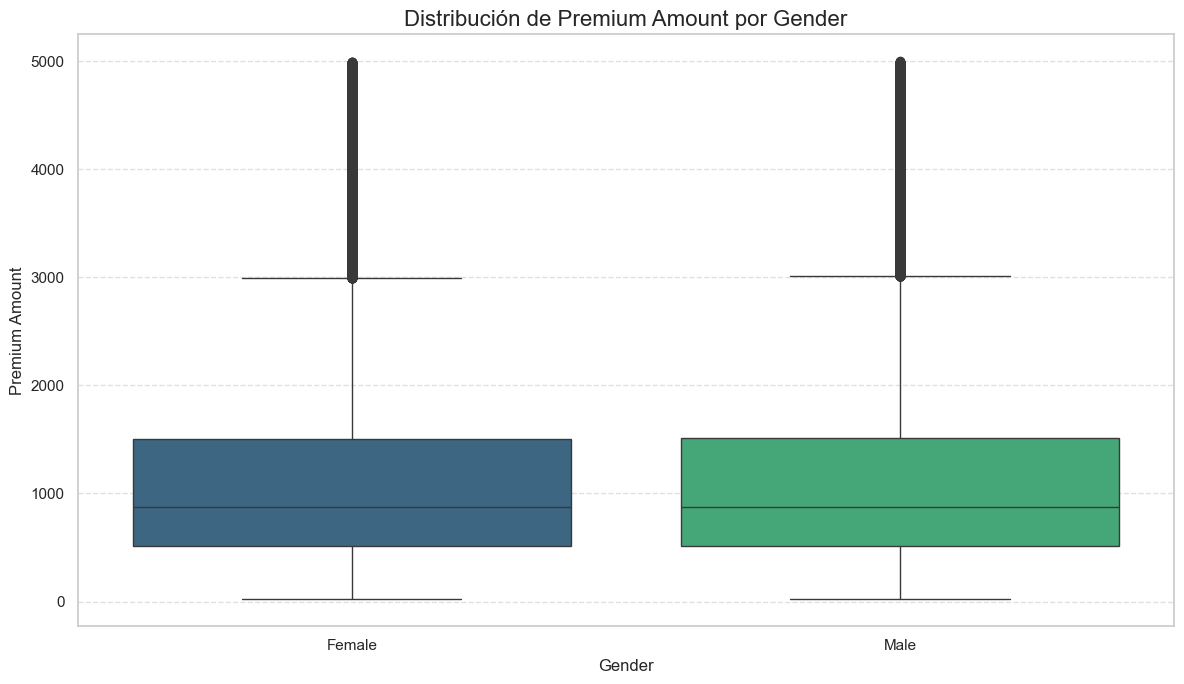


Mediana de Premium Amount por Gender:
Gender
Female    872.0
Male      872.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Marital Status =====


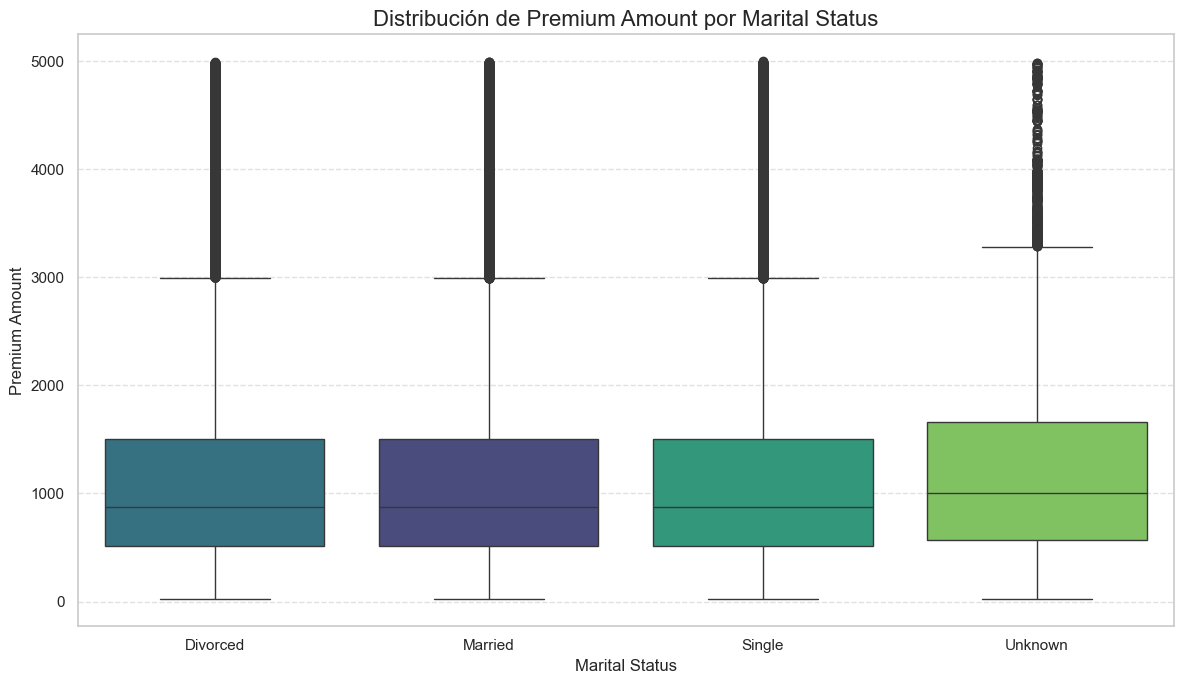


Mediana de Premium Amount por Marital Status:
Marital Status
Unknown     1001.0
Single       872.0
Divorced     870.0
Married      870.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Education Level =====


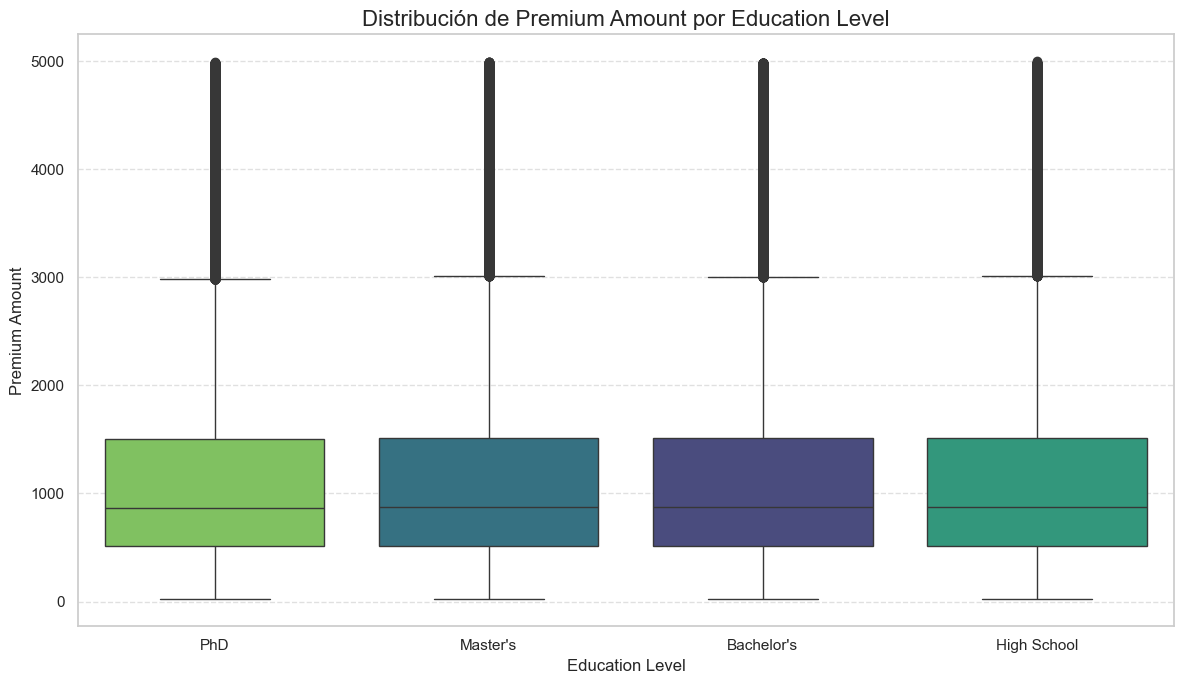


Mediana de Premium Amount por Education Level:
Education Level
High School    876.0
Bachelor's     873.0
Master's       871.0
PhD            869.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Occupation =====


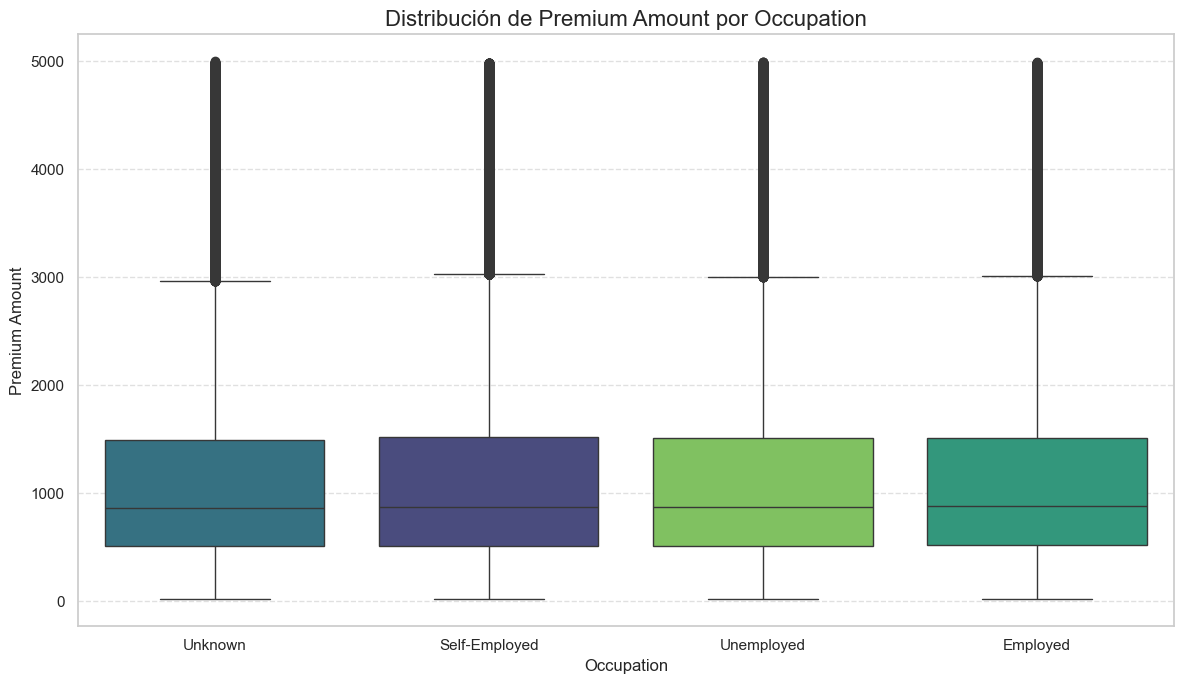


Mediana de Premium Amount por Occupation:
Occupation
Employed         881.0
Self-Employed    874.0
Unemployed       874.0
Unknown          861.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Location =====


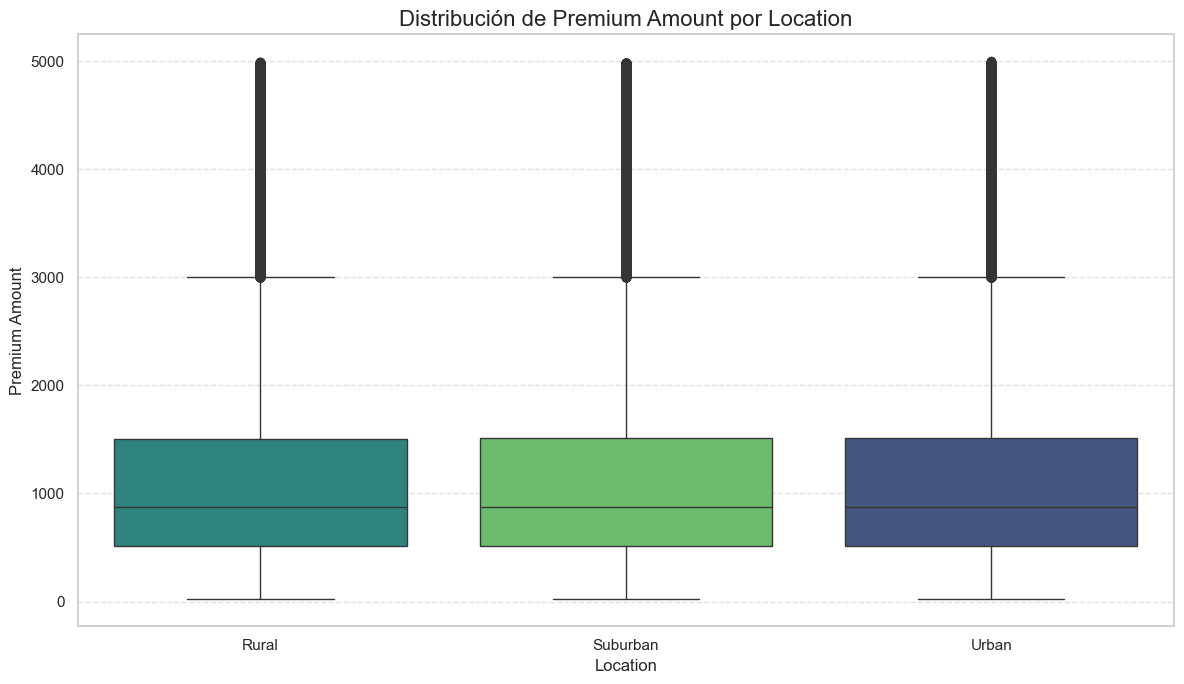


Mediana de Premium Amount por Location:
Location
Urban       874.0
Rural       871.0
Suburban    871.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Policy Type =====


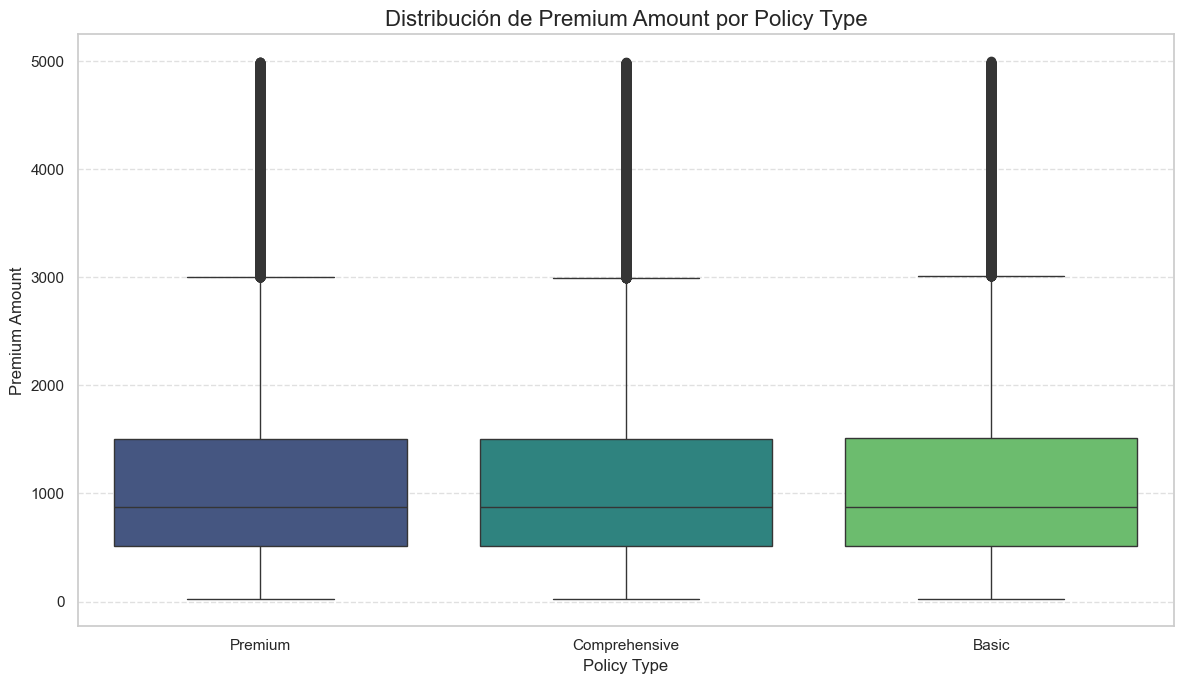


Mediana de Premium Amount por Policy Type:
Policy Type
Basic            874.0
Comprehensive    873.0
Premium          870.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Customer Feedback =====


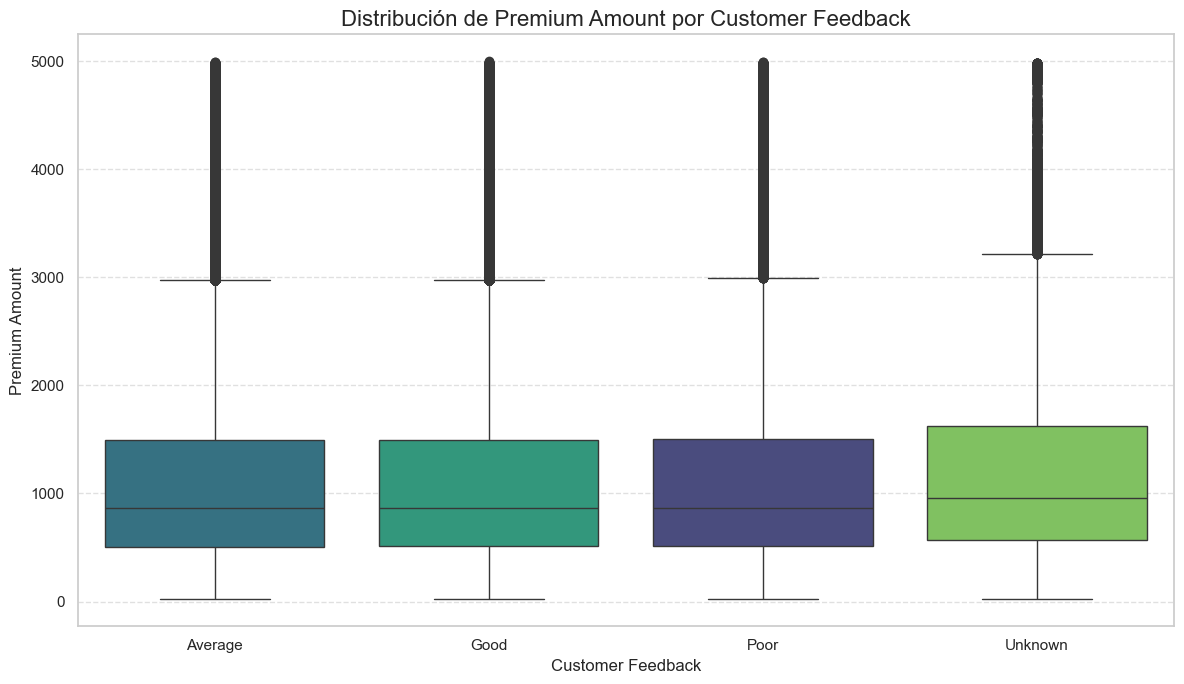


Mediana de Premium Amount por Customer Feedback:
Customer Feedback
Unknown    956.0
Poor       868.0
Average    861.0
Good       861.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Smoking Status =====


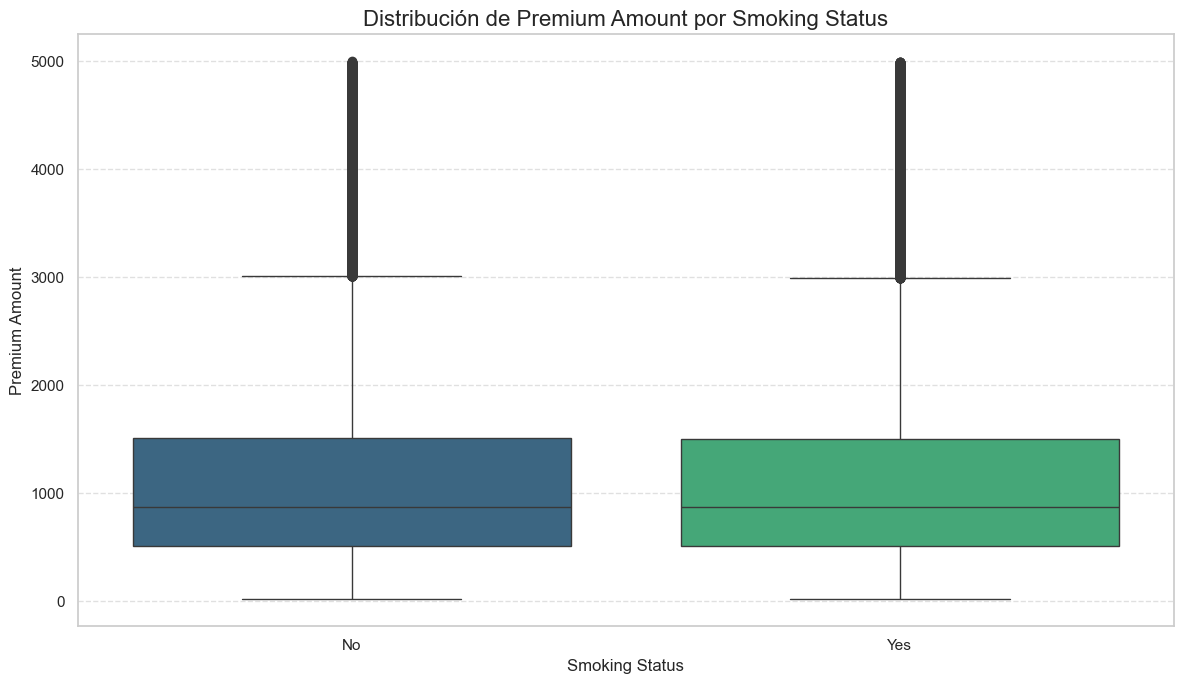


Mediana de Premium Amount por Smoking Status:
Smoking Status
No     872.0
Yes    872.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Exercise Frequency =====


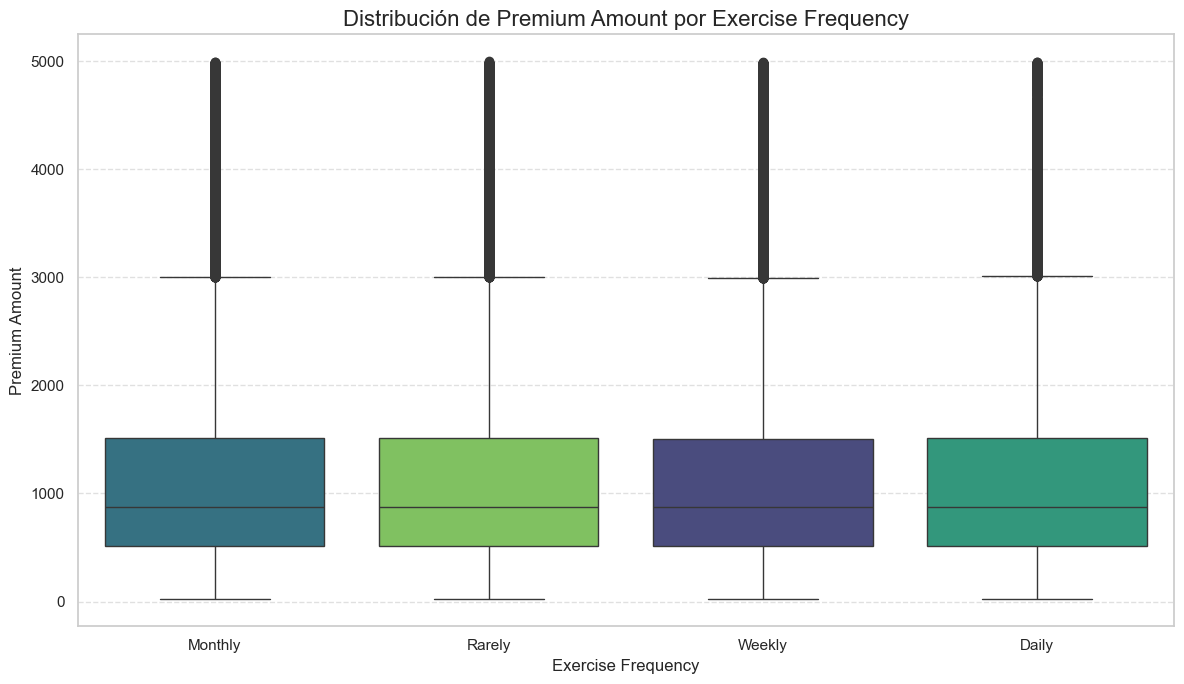


Mediana de Premium Amount por Exercise Frequency:
Exercise Frequency
Daily      874.0
Weekly     872.0
Monthly    871.0
Rarely     871.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

===== Análisis: Premium Amount vs Property Type =====


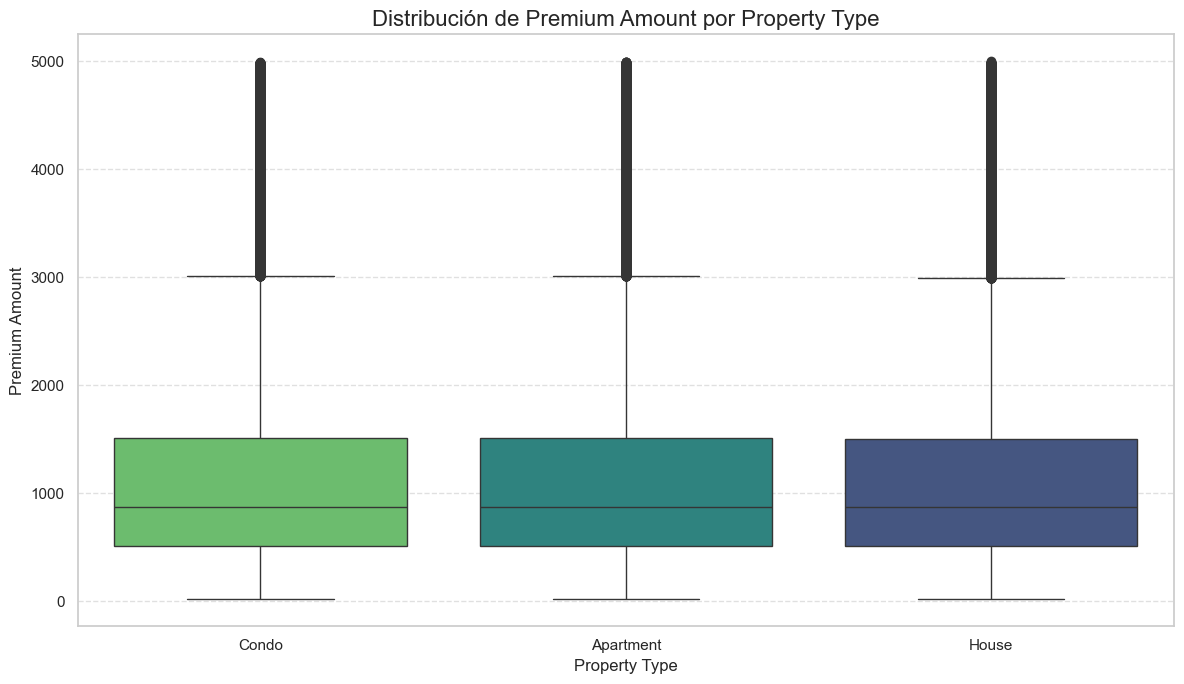


Mediana de Premium Amount por Property Type:
Property Type
House        873.0
Apartment    872.0
Condo        871.0
Name: Premium Amount, dtype: float64
------------------------------------------------------------

--- Análisis Sistemático Categórico Completado ---


In [56]:
target_numeric = 'Premium Amount'

categorical_features = [
    'Gender',
    'Marital Status',
    'Education Level',
    'Occupation',
    'Location',
    'Policy Type',
    'Customer Feedback',
    'Smoking Status',
    'Exercise Frequency',
    'Property Type'
]

def analyze_num_vs_cat(df, num_col, cat_col):
    """
    Genera un Box Plot y calcula medianas para una variable numérica
    agrupada por una variable categórica.
    """
    if num_col not in df.columns:
        print(f"Error: La columna numérica '{num_col}' no existe.")
        return
    if cat_col not in df.columns:
        print(f"\nAdvertencia: La columna categórica '{cat_col}' no existe. Saltando.")
        return

    print(f"\n===== Análisis: {num_col} vs {cat_col} =====")

    plt.figure(figsize=(12, 7))
    try:
        order = df.groupby(cat_col)[num_col].median().sort_values().index
        sns.boxplot(x=cat_col, y=num_col, data=df, order=order, palette="viridis",
                    hue=cat_col, legend=False)
    except Exception as e:
        print(f"Advertencia al ordenar: {e}. Usando orden por defecto.")
        sns.boxplot(x=cat_col, y=num_col, data=df, palette="viridis",
                    hue=cat_col, legend=False)

    plt.title(f'Distribución de {num_col} por {cat_col}', fontsize=16)
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel(num_col, fontsize=12)
    if df[cat_col].nunique() > 5:
        plt.xticks(rotation=45, ha='right')
    else:
        plt.xticks(rotation=0)
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    try:
        median_values = df.groupby(cat_col)[num_col].median().sort_values(ascending=False)
        print(f"\nMediana de {num_col} por {cat_col}:")
        print(median_values)
    except Exception as e:
        print(f"Error al calcular medianas para {cat_col}: {e}")
    print("-" * 60) # Separador visual entre análisis


if target_numeric not in df_cleaned.columns:
    print(f"FATAL: La columna target '{target_numeric}' no se encuentra en df_cleaned.")
else:
    print(f"Iniciando análisis de '{target_numeric}' contra: {categorical_features}")
    for cat_feature in categorical_features:
        analyze_num_vs_cat(df_cleaned, target_numeric, cat_feature)

    print("\n--- Análisis Sistemático Categórico Completado ---")

# Análisis de Segmentación: Asociaciones entre Características Categóricas

Se exploraron las relaciones entre pares seleccionados de variables categóricas en `df_cleaned` mediante tablas de contingencia normalizadas y gráficos de conteo agrupados, con el objetivo de identificar posibles segmentos de clientes o asociaciones entre características.

**Resumen de Hallazgos por Par Analizado:**

* **Análisis: `Location` vs `Customer Feedback`**
    * *Asociación Observada:* **No se observa una asociación significativa.** La distribución del `Customer Feedback` (proporciones de 'Poor', 'Average', 'Good', 'Unknown') es **casi idéntica** en las tres categorías de `Location` ('Urban', 'Rural', 'Suburban'), como se confirma tanto en la tabla de contingencia normalizada como en el gráfico de barras agrupadas. Esto sugiere independencia entre la ubicación y el feedback del cliente en estos datos.
* **Análisis: `Education Level` vs `Customer Feedback`**
    * *Asociación Observada:* **No se aprecia una asociación significativa.** Similar al caso anterior, la distribución del `Customer Feedback` es **muy consistente** a través de todos los `Education Level` mostrados ('Bachelor's', 'High School', 'Master's', 'PhD'). Las proporciones de cada tipo de feedback no varían de forma relevante con el nivel educativo, indicando independencia aparente.
* **Análisis: `Occupation` vs `Education Level`**
    * *Asociación Observada:* Sorprendentemente, se observa una **independencia casi perfecta**, lo cual es muy contraintuitivo. La tabla de contingencia muestra que la proporción de cada `Education Level` es aproximadamente **0.25 dentro de cada categoría de `Occupation`** ('Employed', 'Self-Employed', 'Unemployed', 'Unknown'). El gráfico de barras confirma que la distribución de niveles educativos es idéntica independientemente de la ocupación registrada.

**Conclusiones:**

* El análisis de los pares categóricos seleccionados revela una **consistente falta de asociación** entre ellos dentro de este dataset. Variables que a menudo están interrelacionadas en el mundo real (como Ocupación y Educación) aquí aparecen como estadísticamente independientes.
* El `Customer Feedback`, en particular, parece ser **independiente** tanto de la `Location` como del `Education Level` del cliente en esta muestra.
* Estos resultados, sumados a los análisis previos (débil correlación numérica, falta de impacto categórico en `Premium Amount`), refuerzan la idea de que el dataset `df_cleaned` presenta **patrones muy inusuales o simplificados**. Desde una perspectiva de segmentación basada en estos cruces, **no se identifican segmentos claros** o diferenciados basados en las combinaciones analizadas. La homogeneidad observada limita la utilidad de estas variables para crear perfiles distintos basados en asociaciones simples. Es probable que cualquier segmentación efectiva requiera buscar interacciones más complejas o basarse en factores externos o no incluidos en este análisis.

>>> Iniciando Análisis de Asociaciones entre Pares Categóricos <<<
Analizando los siguientes pares: [('Location', 'Customer Feedback'), ('Education Level', 'Customer Feedback'), ('Occupation', 'Education Level')]

===== Análisis de Asociación: Location vs Customer Feedback =====

Tabla de Contingencia Normalizada (Proporciones de 'Customer Feedback' por cada 'Location'):
Customer Feedback  Average   Good   Poor  Unknown
Location                                         
Rural                0.315  0.307  0.313    0.065
Suburban             0.314  0.308  0.314    0.065
Urban                0.317  0.307  0.311    0.065
------------------------------


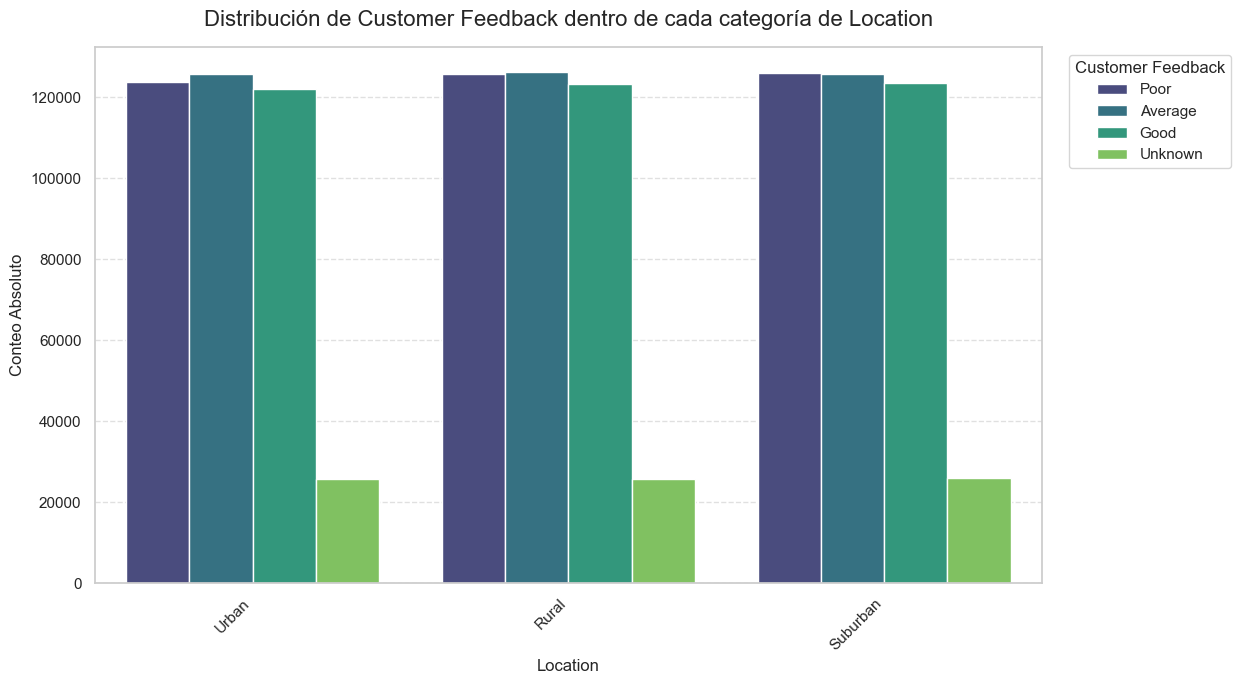

------------------------------------------------------------

===== Análisis de Asociación: Education Level vs Customer Feedback =====

Tabla de Contingencia Normalizada (Proporciones de 'Customer Feedback' por cada 'Education Level'):
Customer Feedback  Average   Good   Poor  Unknown
Education Level                                  
Bachelor's           0.316  0.307  0.312    0.065
High School          0.314  0.308  0.313    0.065
Master's             0.315  0.306  0.314    0.065
PhD                  0.314  0.308  0.313    0.064
------------------------------


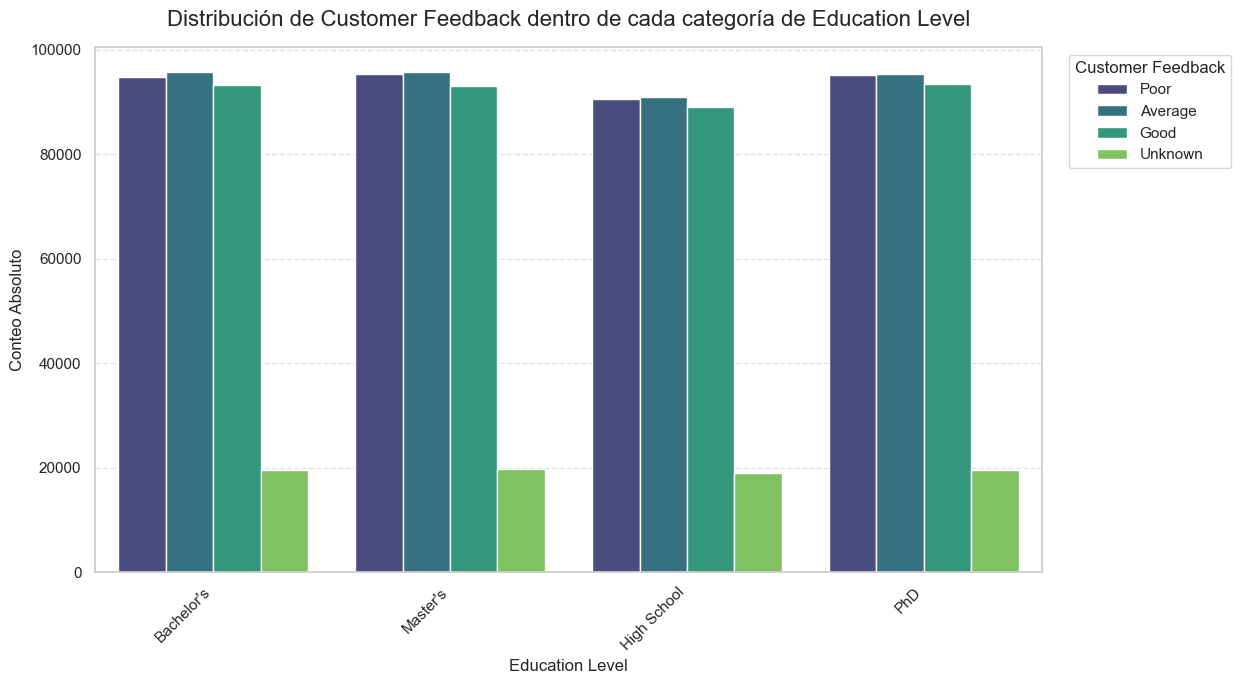

------------------------------------------------------------

===== Análisis de Asociación: Occupation vs Education Level =====

Tabla de Contingencia Normalizada (Proporciones de 'Education Level' por cada 'Occupation'):
Education Level  Bachelor's  High School  Master's    PhD
Occupation                                               
Employed              0.255        0.240     0.253  0.252
Self-Employed         0.252        0.241     0.253  0.253
Unemployed            0.252        0.241     0.255  0.252
Unknown               0.252        0.242     0.252  0.254
------------------------------


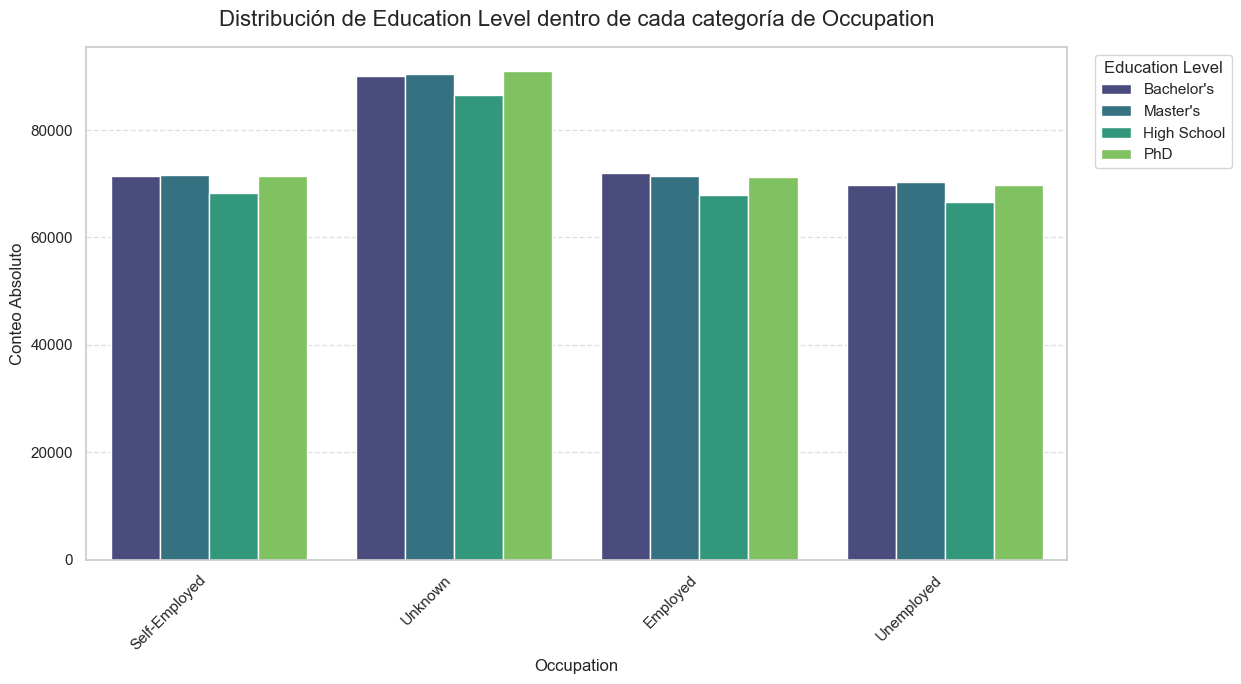

------------------------------------------------------------

--- Análisis de Pares Categóricos Completado ---


In [58]:
pair1 = ('Location', 'Customer Feedback')
pair2 = ('Education Level', 'Customer Feedback')
pair3 = ('Occupation', 'Education Level')

pairs_to_analyze = [pair1, pair2, pair3]

def analyze_cat_vs_cat(df, cat1, cat2):
    """
    Calcula tabla de contingencia normalizada y genera un countplot agrupado
    para analizar la asociación entre dos variables categóricas.
    """
    if cat1 not in df.columns:
        print(f"Error: La columna '{cat1}' no existe.")
        return
    if cat2 not in df.columns:
        print(f"Error: La columna '{cat2}' no existe.")
        return

    print(f"\n===== Análisis de Asociación: {cat1} vs {cat2} =====")

    try:
        contingency_table_norm = pd.crosstab(df[cat1], df[cat2], normalize='index')
        print(f"\nTabla de Contingencia Normalizada (Proporciones de '{cat2}' por cada '{cat1}'):")
        print(contingency_table_norm.round(3))
    except Exception as e:
        print(f"Error al calcular la tabla de contingencia para {cat1} vs {cat2}: {e}")
        contingency_table_norm = None

    print("-" * 30)

    plt.figure(figsize=(14, 7))

    sns.countplot(data=df, x=cat1, hue=cat2, dodge=True, palette='viridis')

    plt.title(f'Distribución de {cat2} dentro de cada categoría de {cat1}', fontsize=16, pad=15)
    plt.xlabel(cat1, fontsize=12)
    plt.ylabel('Conteo Absoluto', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=cat2, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()

    print("-" * 60)

print(">>> Iniciando Análisis de Asociaciones entre Pares Categóricos <<<")

if 'df_cleaned' not in locals() or not isinstance(df_cleaned, pd.DataFrame) or df_cleaned.empty:
    print("Error: El DataFrame 'df_cleaned' no está definido o está vacío.")
else:
    print(f"Analizando los siguientes pares: {pairs_to_analyze}")
    for c1, c2 in pairs_to_analyze:
        analyze_cat_vs_cat(df_cleaned, c1, c2)

    print("\n--- Análisis de Pares Categóricos Completado ---")

# Análisis de Segmentación: Asociaciones entre Características Categóricas

Se exploraron las relaciones entre pares seleccionados de variables categóricas en `df_cleaned` mediante tablas de contingencia normalizadas y gráficos de conteo agrupados, con el objetivo de identificar posibles segmentos de clientes o asociaciones entre características.

**Resumen de Hallazgos por Par Analizado:**

* **Análisis: `Location` vs `Customer Feedback`**
    * *Asociación Observada:* **No se observa una asociación significativa.** La distribución del `Customer Feedback` (proporciones y conteos relativos de 'Poor', 'Average', 'Good', 'Unknown') es **casi idéntica** en las tres categorías de `Location` ('Urban', 'Rural', 'Suburban'), como se confirma tanto en la tabla como en el gráfico. Esto sugiere independencia entre la ubicación y el feedback del cliente en estos datos.
* **Análisis: `Education Level` vs `Customer Feedback`**
    * *Asociación Observada:* **No se aprecia una asociación significativa.** Similar al caso anterior, la distribución del `Customer Feedback` es **muy consistente** a través de todos los `Education Level` mostrados ('Bachelor's', 'High School', 'Master's', 'PhD'). Las proporciones y los patrones visuales no varían de forma relevante con el nivel educativo, indicando independencia aparente.
* **Análisis: `Occupation` vs `Education Level`**
    * *Asociación Observada:* Los resultados indican una **independencia casi perfecta**, lo cual es altamente contraintuitivo. La tabla de contingencia muestra proporciones de ~0.25 para cada `Education Level` dentro de cada `Occupation`, y el gráfico de barras confirma visualmente que la distribución de niveles educativos es **idéntica** independientemente de la ocupación registrada (incluyendo 'Unknown').

**Conclusiones del Analista de Segmentación:**

* El análisis visual de los pares categóricos seleccionados revela una **consistente falta de asociación** entre ellos dentro de este dataset. Variables que a menudo están interrelacionadas en el mundo real (como Ocupación y Educación) aquí aparecen como estadísticamente independientes.
* El `Customer Feedback`, en particular, parece ser **independiente** tanto de la `Location` como del `Education Level` del cliente en esta muestra.
* Estos resultados, sumados a los análisis previos, refuerzan la idea de que el dataset `df_cleaned` presenta **patrones muy inusuales**. Desde una perspectiva de segmentación basada en estos cruces, **no se identifican segmentos claros** o diferenciados basados en las combinaciones analizadas. La homogeneidad observada limita la utilidad de estas variables para crear perfiles distintos basados en asociaciones simples.


===== Análisis Visual: Age vs Premium Amount por Policy Type =====


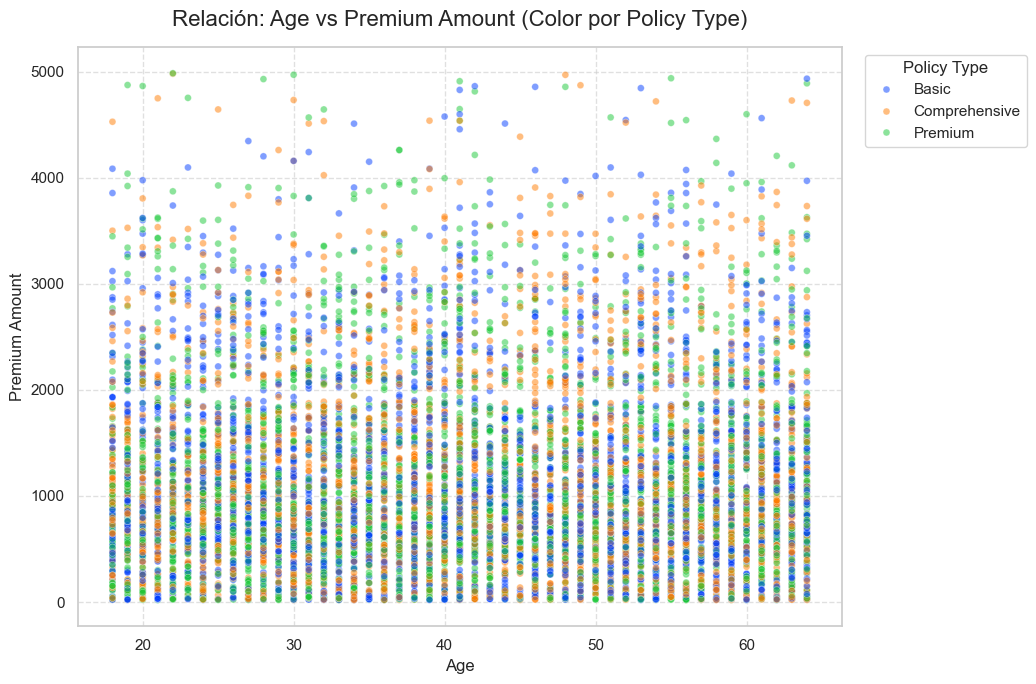

------------------------------------------------------------

===== Análisis Visual: Annual Income vs Premium Amount por Location =====


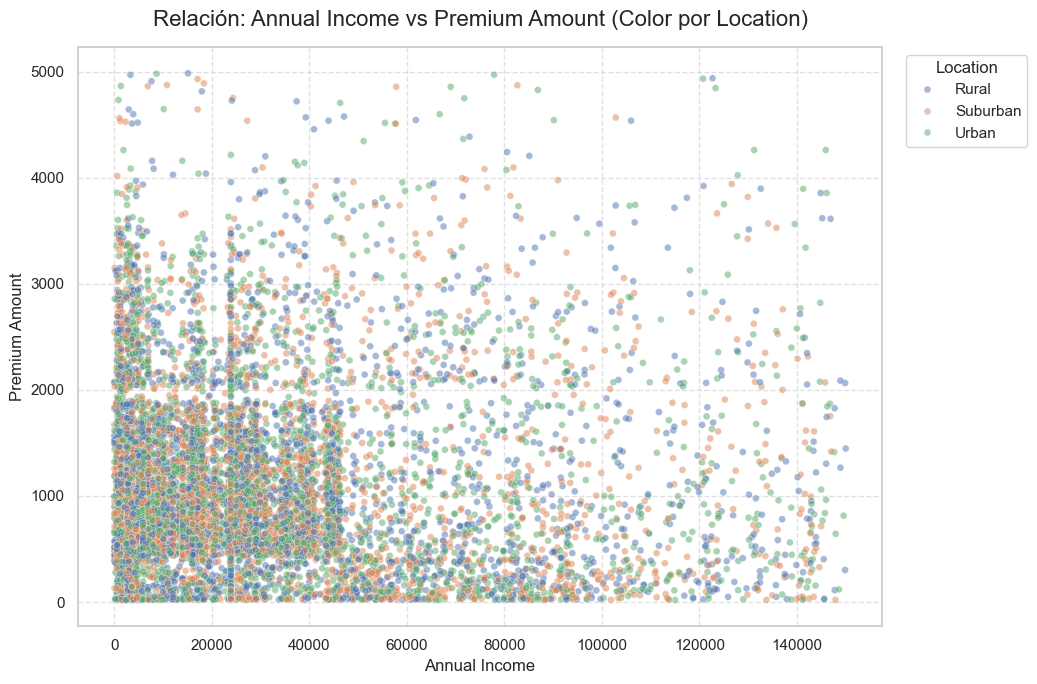

------------------------------------------------------------

===== Análisis Visual: Health Score vs Premium Amount por Smoking Status =====


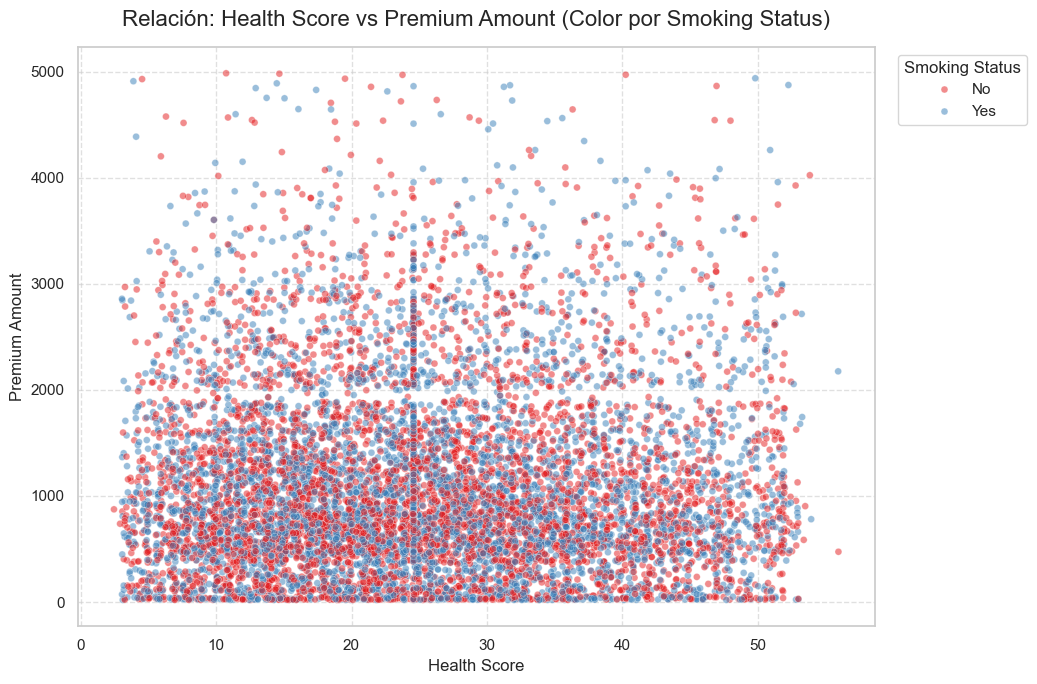

------------------------------------------------------------

--- Análisis Visual de Interacciones Completado ---


In [60]:
# ---- Combinación 1: Age vs Premium Amount por Policy Type ----

x_var1 = 'Age'
y_var1 = 'Premium Amount'
hue_var1 = 'Policy Type' # Asegúrate que esta columna existe

print(f"\n===== Análisis Visual: {x_var1} vs {y_var1} por {hue_var1} =====")

if all(col in df_cleaned.columns for col in [x_var1, y_var1, hue_var1]):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(
        data=df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned, # Muestra si es muy grande
        x=x_var1,
        y=y_var1,
        hue=hue_var1,
        alpha=0.5,      # Transparencia para ver superposición
        s=25,           # Tamaño de puntos
        palette='bright' # Paleta de colores distinguibles
    )
    plt.title(f'Relación: {x_var1} vs {y_var1} (Color por {hue_var1})', fontsize=16, pad=15)
    plt.xlabel(x_var1, fontsize=12)
    plt.ylabel(y_var1, fontsize=12)
    plt.legend(title=hue_var1, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajustar para leyenda
    plt.show()
else:
    print(f"No se pudo generar el gráfico: una o más columnas ({x_var1}, {y_var1}, {hue_var1}) no existen.")
print("-" * 60)

# ---- Combinación 2: Annual Income vs Premium Amount por Location ----

x_var2 = 'Annual Income'
y_var2 = 'Premium Amount'
hue_var2 = 'Location' # Asegúrate que esta columna existe

print(f"\n===== Análisis Visual: {x_var2} vs {y_var2} por {hue_var2} =====")

if all(col in df_cleaned.columns for col in [x_var2, y_var2, hue_var2]):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(
        data=df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned,
        x=x_var2,
        y=y_var2,
        hue=hue_var2,
        alpha=0.5,
        s=25,
        palette='deep'
    )
    plt.title(f'Relación: {x_var2} vs {y_var2} (Color por {hue_var2})', fontsize=16, pad=15)
    plt.xlabel(x_var2, fontsize=12)
    plt.ylabel(y_var2, fontsize=12)
    plt.legend(title=hue_var2, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.88, 1])
    plt.show()
else:
    print(f"No se pudo generar el gráfico: una o más columnas ({x_var2}, {y_var2}, {hue_var2}) no existen.")
print("-" * 60)

# ---- Combinación 3: Health Score vs Premium Amount por Smoking Status ----

x_var3 = 'Health Score'
y_var3 = 'Premium Amount'
hue_var3 = 'Smoking Status' # Asegúrate que esta columna existe

print(f"\n===== Análisis Visual: {x_var3} vs {y_var3} por {hue_var3} =====")

if all(col in df_cleaned.columns for col in [x_var3, y_var3, hue_var3]):
    plt.figure(figsize=(12, 7))
    sns.scatterplot(
        data=df_cleaned.sample(n=10000, random_state=42) if len(df_cleaned) > 10000 else df_cleaned,
        x=x_var3,
        y=y_var3,
        hue=hue_var3,
        alpha=0.5,
        s=25,
        palette='Set1'
    )
    plt.title(f'Relación: {x_var3} vs {y_var3} (Color por {hue_var3})', fontsize=16, pad=15)
    plt.xlabel(x_var3, fontsize=12)
    plt.ylabel(y_var3, fontsize=12)
    plt.legend(title=hue_var3, bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout(rect=[0, 0, 0.88, 1])
    plt.show()
else:
    print(f"No se pudo generar el gráfico: una o más columnas ({x_var3}, {y_var3}, {hue_var3}) no existen.")
print("-" * 60)

print("\n--- Análisis Visual de Interacciones Completado ---")

# Análisis Visual de Interacciones Potenciales con Premium Amount

Se generaron gráficos de dispersión coloreando los puntos según una tercera variable categórica (`hue`) para investigar visualmente si la relación entre dos variables numéricas cambia entre diferentes grupos de clientes, basándose en los gráficos de `asd5.jpg`.

---

### Interacción: Age vs Premium Amount (por Policy Type)

* **¿Separación Visual?** Los puntos correspondientes a los diferentes `Policy Type` (Basic, Comprehensive, Premium) aparecen **completamente superpuestos y mezclados** en todo el gráfico. No hay una separación visual clara de los grupos por color.
* **¿Cambio en Relación?** La relación general entre `Age` y `Premium Amount`, caracterizada por una nube de puntos plana y dispersa sin tendencia discernible, **parece ser idéntica** para todos los tipos de póliza. Ningún tipo de póliza muestra un patrón distinto.
* **¿Clusters?** **No se observan clusters** o agrupaciones basadas en el `Policy Type`.

---

### Interacción: Annual Income vs Premium Amount (por Location)

* **¿Separación Visual?** Los puntos de las diferentes `Location` ('Urban', 'Suburban', 'Rural') están **totalmente entremezclados** a lo largo de la distribución de ingresos y primas.
* **¿Cambio en Relación?** La falta general de una relación clara entre `Annual Income` y `Premium Amount` **se mantiene igual para las tres ubicaciones**. No parece que la locación modifique esta débil/inexistente relación.
* **¿Clusters?** **No se identifican clusters** definidos por `Location`.

---

### Interacción: Health Score vs Premium Amount (por Smoking Status)

* **¿Separación Visual?** Los puntos de fumadores ('Yes') y no fumadores ('No') están **completamente superpuestos**. No hay ninguna separación visual entre los dos grupos en el gráfico.
* **¿Cambio en Relación?** La relación (o falta de ella) entre `Health Score` y `Premium Amount` es **visualmente idéntica para ambos grupos**. La nube de puntos dispersa y sin tendencia clara se observa tanto para fumadores como para no fumadores, confirmando análisis bivariados previos.
* **¿Clusters?** **No se observan clusters** ni separación alguna basada en `Smoking Status`.

---

**Conclusión del Analista Visual:**

La exploración visual buscando interacciones mediante gráficos de dispersión coloreados **no reveló patrones de interacción evidentes** para las combinaciones de variables analizadas en este dataset. En todos los casos:

1.  Los puntos de las diferentes categorías de la variable `hue` aparecen **totalmente mezclados**.
2.  La relación (o la falta de ella) entre las variables de los ejes X e Y **no cambia** de forma apreciable entre las distintas categorías de `hue`.

Estos hallazgos son consistentes con todos los análisis previos y refuerzan la conclusión general sobre la **debilidad de las asociaciones individuales y la falta de interacciones simples** en estos datos. La variabilidad en `Premium Amount` parece no estar fuertemente ligada a estos factores o a sus combinaciones directas.

--- Generando Pairplot para ['Age', 'Annual Income', 'Health Score', 'Premium Amount'] con hue='Policy Type' ---
Tomando muestra de 5000 filas para el pairplot...


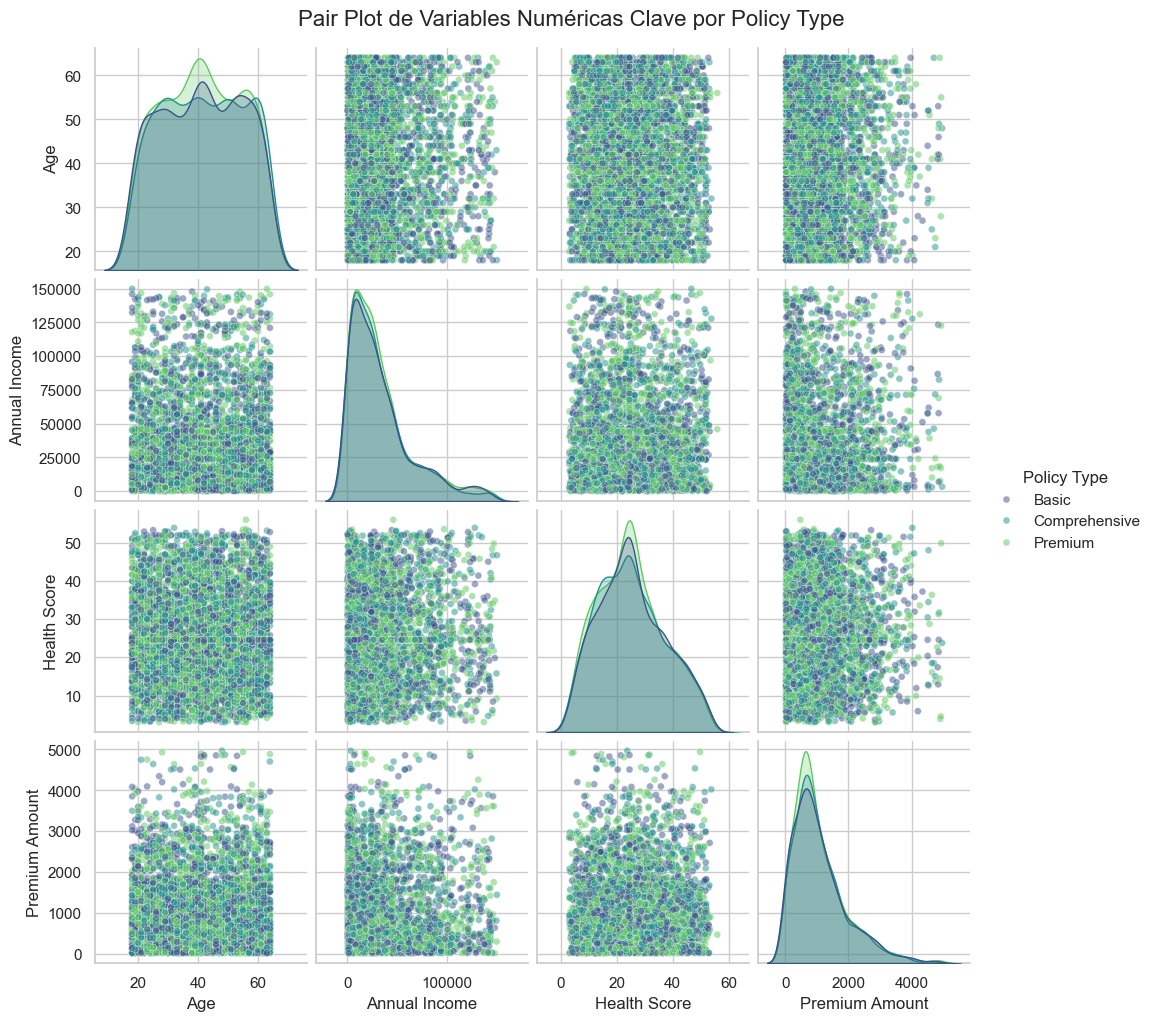


--- Generación de Pairplot Completada ---


In [64]:
numerical_subset = ['Age', 'Annual Income', 'Health Score', 'Premium Amount']
hue_var = 'Policy Type'

cols_for_pairplot = numerical_subset + [hue_var]
missing_cols = [col for col in cols_for_pairplot if col not in df_cleaned.columns]

if missing_cols:
    print(f"Error: Las siguientes columnas necesarias no existen: {missing_cols}. No se puede generar el Pairplot.")
else:
    print(f"--- Generando Pairplot para {numerical_subset} con hue='{hue_var}' ---")

    df_subset = df_cleaned[cols_for_pairplot].dropna()

    sample_size = 5000
    if len(df_subset) > sample_size:
        print(f"Tomando muestra de {sample_size} filas para el pairplot...")
        df_subset_sampled = df_subset.sample(n=sample_size, random_state=42)
    else:
        df_subset_sampled = df_subset

    try:
        pair_plot = sns.pairplot(
            df_subset_sampled,
            hue=hue_var,
            plot_kws={'alpha': 0.5, 's': 25},
            palette='viridis',
            diag_kind='kde'
        )
        pair_plot.fig.suptitle(f'Pair Plot de Variables Numéricas Clave por {hue_var}', y=1.02, fontsize=16) # Título general
        plt.show()
    except Exception as e:
        print(f"Ocurrió un error al generar el pairplot: {e}")

    print("\n--- Generación de Pairplot Completada ---")


# Conclusiones Finales del Análisis Exploratorio de Datos (EDA)

## Introducción

Este Análisis Exploratorio de Datos (EDA) se realizó sobre el dataset de seguros procesado (`df_cleaned`), derivado del archivo original `train.csv`. El objetivo fue comprender la estructura de los datos, las características de las variables individuales, identificar relaciones entre ellas y, en particular, explorar los factores asociados con el `Premium Amount`. Se siguieron pasos metodológicos estándar, incluyendo carga de datos, limpieza (imputación de NaNs, corrección de tipos), análisis univariado, análisis bivariado (numérico-numérico, categórico-numérico, categórico-categórico) y exploración visual multivariada.

## Hallazgos Principales

El análisis reveló consistentemente una serie de patrones y características, algunas de las cuales son notablemente inesperadas en el contexto de datos de seguros:

1.  **Estructura y Calidad del Dataset:**
    * El dataset es de tamaño considerable (1.2 millones de registros, 21 columnas).
    * La limpieza de datos abordó eficazmente los valores faltantes (que eran significativos en columnas como `Occupation`, `Previous Claims`, `Credit Score`, etc.) mediante imputación por mediana (numéricos) o la categoría 'Unknown' (categóricos), resultando en un dataset completo (`df_cleaned`).
    * La variable `Policy Start Date` se convirtió correctamente a formato datetime.

2.  **Distribución de `Premium Amount`:**
    * La variable objetivo, `Premium Amount`, muestra una distribución **fuertemente sesgada a la derecha**, con una **mediana de 872** y una media más alta (1102.5), indicando que la mayoría de las primas son bajas pero existen valores significativamente más altos.
    * Presenta una **alta variabilidad** (desviación estándar de 865).
    * El análisis de boxplot reveló una **gran cantidad de outliers** en el extremo superior (primas > ~3000).

3.  **Relaciones Numéricas (Correlación Pearson y Spearman):**
    * Se encontró una **ausencia casi total de correlaciones lineales (Pearson) y monotónicas (Spearman) significativas** entre las variables numéricas analizadas.
    * La correlación más "fuerte" observada fue entre `Annual Income` y `Credit Score` (Pearson ≈ -0.18, Spearman ≈ -0.13), que sigue siendo débil.
    * Crucialmente, `Premium Amount` mostró correlaciones **prácticamente nulas** (valores entre -0.06 y 0.04) con todas las demás variables numéricas (`Age`, `Annual Income`, `Health Score`, `Credit Score`, `Previous Claims`, etc.), tanto lineal como monotónicamente.

4.  **Impacto de Variables Categóricas en `Premium Amount`:**
    * El análisis sistemático (boxplots, medianas por grupo) reveló que **ninguna de las variables categóricas examinadas** (`Smoking Status`, `Gender`, `Marital Status`, `Education Level`, `Occupation`, `Location`, `Policy Type`, `Property Type`, `Exercise Frequency`, `Customer Feedback`) mostró una **diferencia significativa o prácticamente relevante** en la mediana o distribución de `Premium Amount` entre sus categorías.
    * El hallazgo de que `Smoking Status` o `Policy Type` no diferencian la prima mediana es **particularmente anómalo**.

5.  **Asociaciones entre Variables Categóricas:**
    * El análisis de pares categóricos también mostró **independencia inesperada** entre variables que suelen estar relacionadas, destacando la falta de asociación entre `Occupation` y `Education Level`.

6.  **Análisis Visual Multivariado (Interacciones):**
    * Las visualizaciones usando `hue` en scatter plots y el `pairplot` **no revelaron interacciones simples evidentes**. Las relaciones (o falta de ellas) entre variables numéricas parecían consistentes a través de las diferentes categorías de `Policy Type`, `Location` o `Smoking Status`.

## Conclusión General sobre el Dataset

El hallazgo más importante y recurrente de este EDA es la **sorprendente falta de relaciones y diferenciaciones esperadas** en un dataset de seguros. Variables clave que típicamente impulsan la segmentación y tarificación (edad, ingresos, salud, score crediticio, historial de reclamos, tipo de póliza, ser fumador, ubicación, ocupación, nivel educativo) muestran asociaciones individuales extremadamente débiles o nulas con el `Premium Amount` y, en muchos casos, entre sí.

## Implicaciones

* **Para el Modelado:**
    * Predecir `Premium Amount` basándose en relaciones individuales (lineales, monotónicas o de segmentación simple por categoría) con las variables presentes será **muy difícil**.
    * Los modelos simples probablemente tendrán un rendimiento bajo. Se requerirían modelos más complejos capaces de capturar interacciones sutiles (si existen) o relaciones no lineales complejas, o bien una ingeniería de características más avanzada.
    * La selección de variables basada en este EDA resulta problemática, ya que pocos predictores individuales destacan.
* **Sobre la Naturaleza de los Datos:**
    * Los resultados consistentes sugieren fuertemente que este dataset **no es representativo de un proceso real de tarificación de seguros estándar**. Es muy probable que sea **sintético, que haya sido sometido a procesos de anonimización/modificación que eliminaron relaciones, o que represente un producto o contexto extremadamente específico y atípico.**